# Importing Required Libraries

In [77]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Importing Data

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Dataset Preparation

In [6]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [7]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [8]:
df['PRICE'] = boston.target

In [9]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [13]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

# Exploratory Data Analysis

<AxesSubplot:>

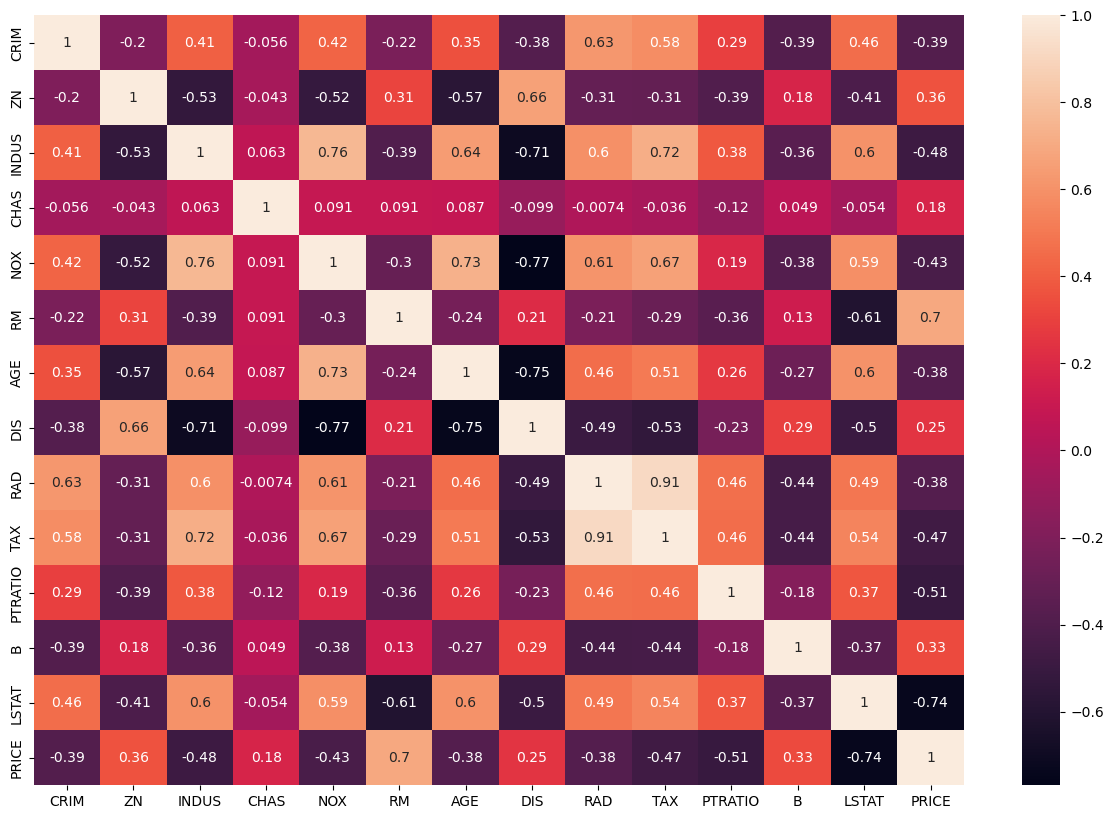

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True)

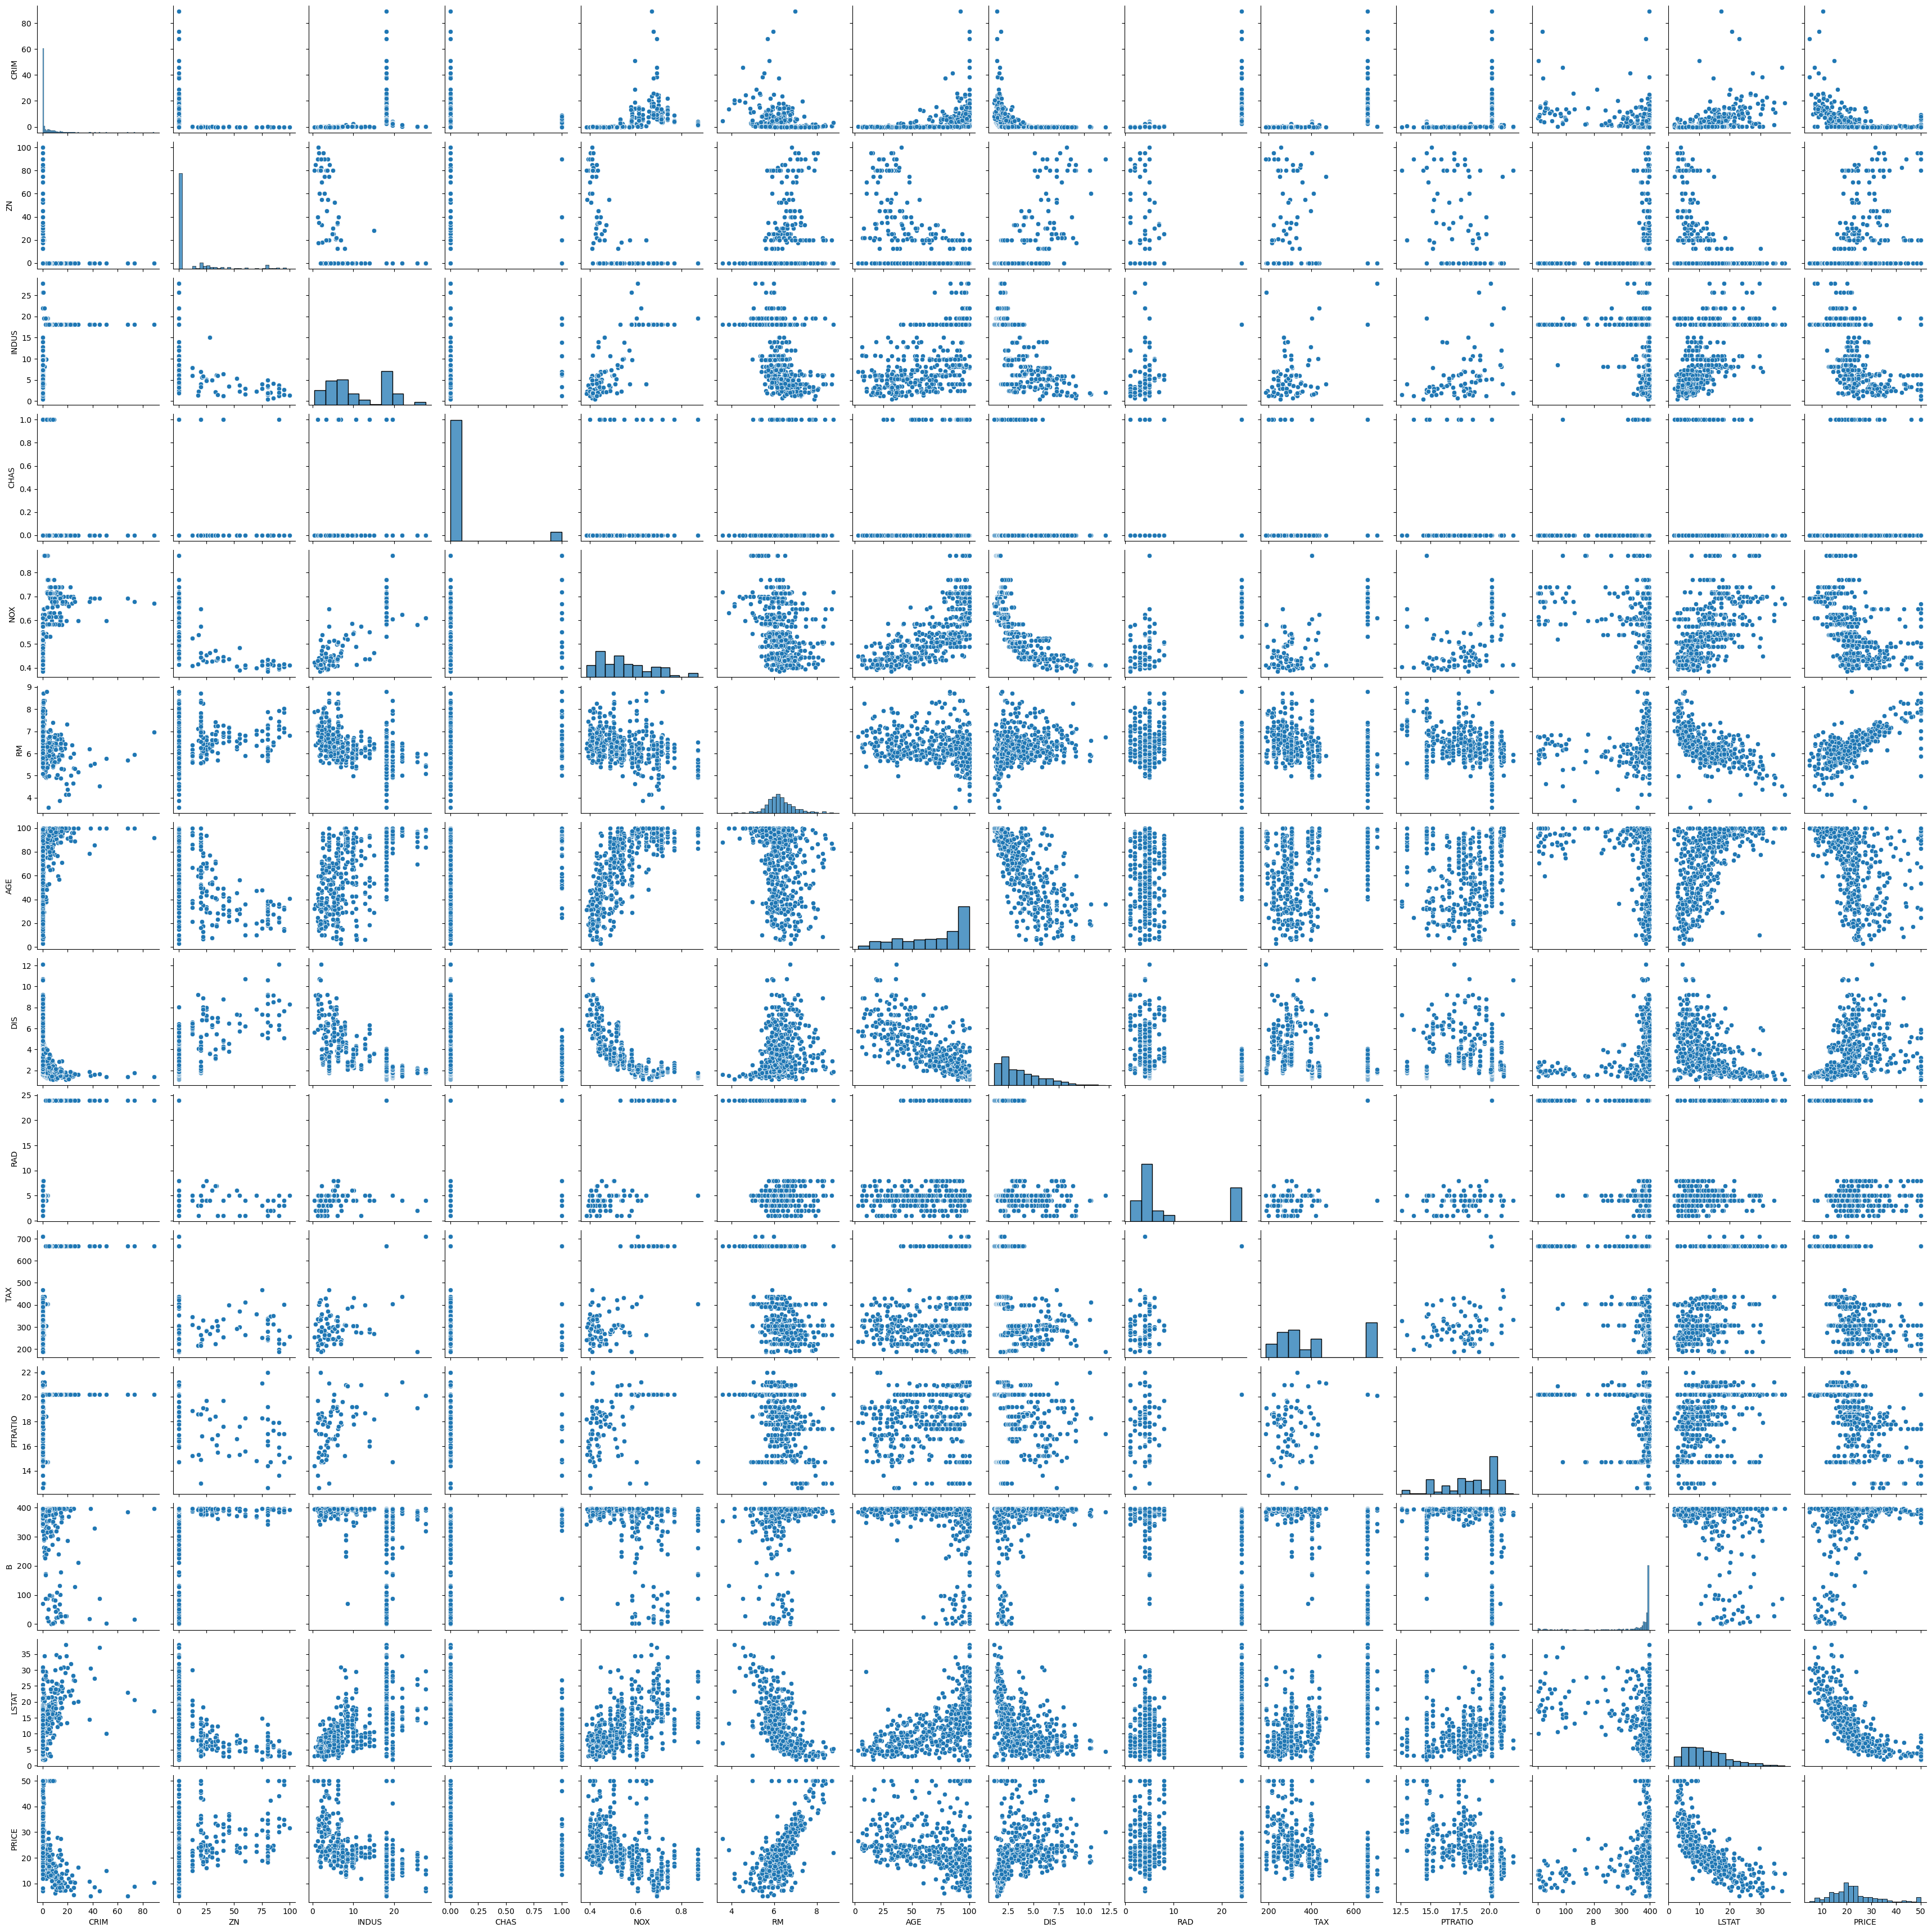

In [15]:
sns.pairplot(df)

<AxesSubplot:xlabel='CRIM', ylabel='PRICE'>

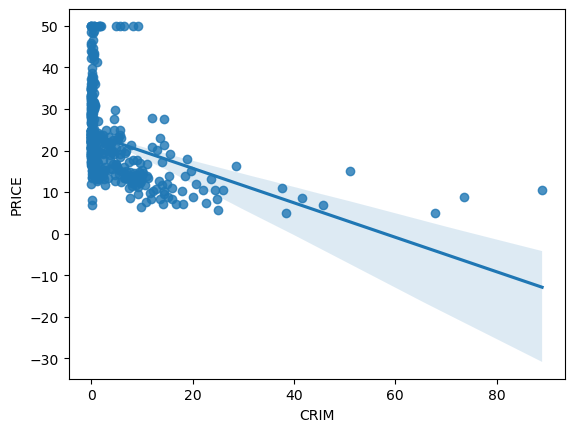

In [16]:
sns.regplot(x="CRIM",y="PRICE",data=df)

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

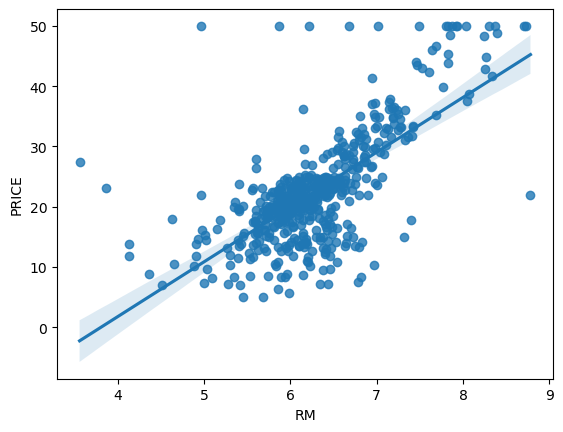

In [17]:
sns.regplot(x="RM",y="PRICE",data=df)

<AxesSubplot:xlabel='INDUS', ylabel='PRICE'>

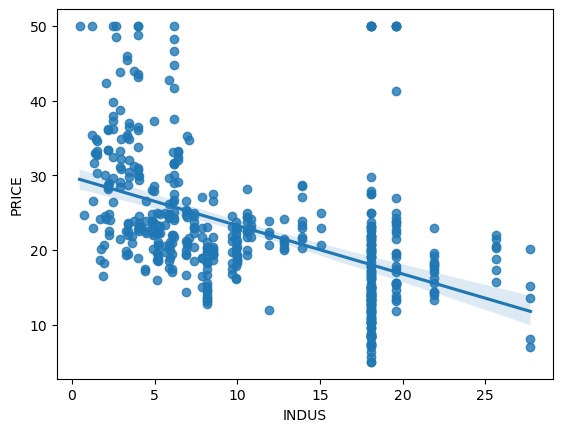

In [18]:
sns.regplot(x="INDUS",y="PRICE",data=df)

<AxesSubplot:xlabel='CHAS', ylabel='PRICE'>

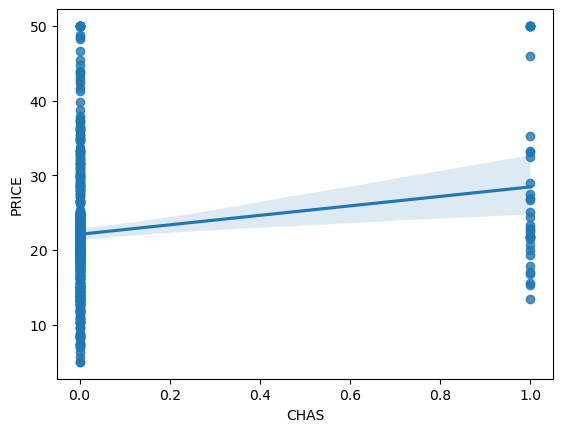

In [19]:
sns.regplot(x="CHAS",y="PRICE",data=df)

<AxesSubplot:xlabel='ZN', ylabel='PRICE'>

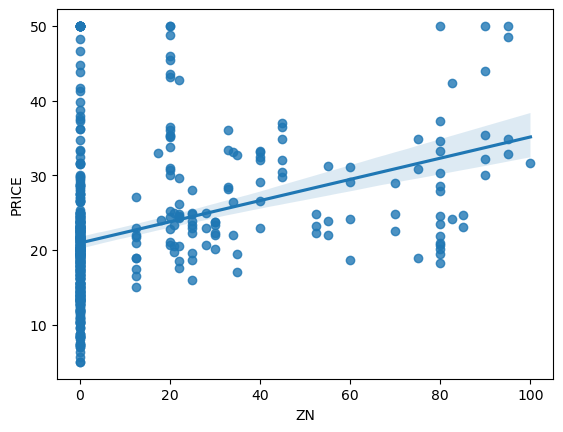

In [20]:
sns.regplot(x="ZN",y="PRICE",data=df)

<AxesSubplot:xlabel='NOX', ylabel='PRICE'>

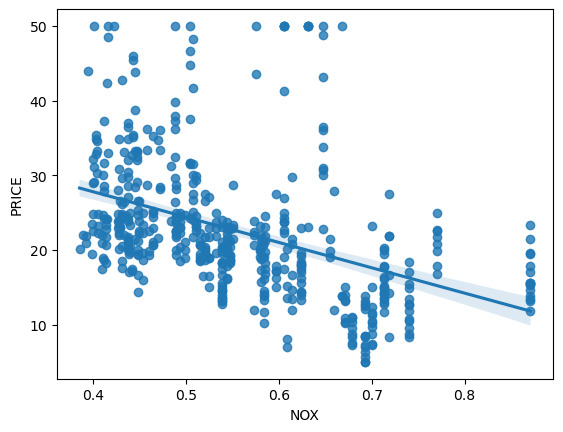

In [21]:
sns.regplot(x="NOX",y="PRICE",data=df)

<AxesSubplot:xlabel='AGE', ylabel='PRICE'>

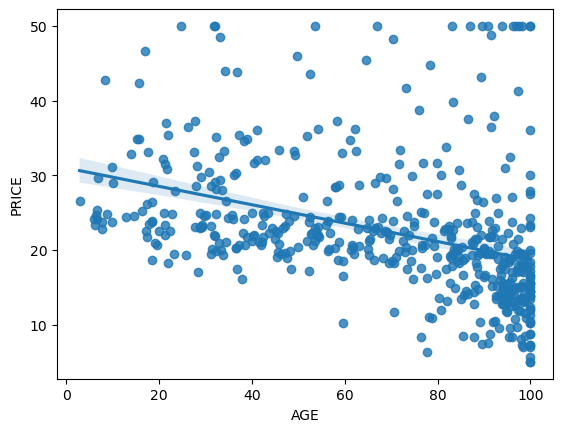

In [22]:
sns.regplot(x="AGE",y="PRICE",data=df)

<AxesSubplot:xlabel='DIS', ylabel='PRICE'>

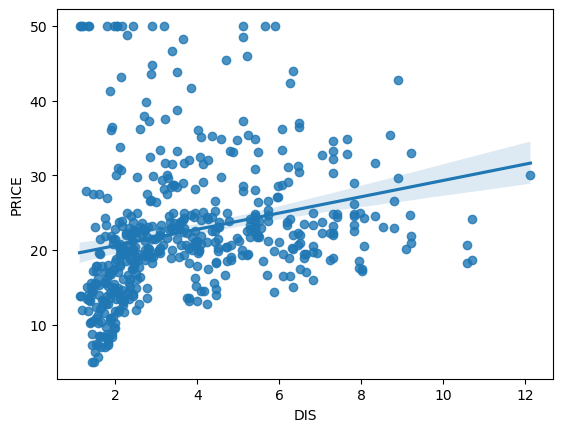

In [23]:
sns.regplot(x="DIS",y="PRICE",data=df)

<AxesSubplot:xlabel='RAD', ylabel='PRICE'>

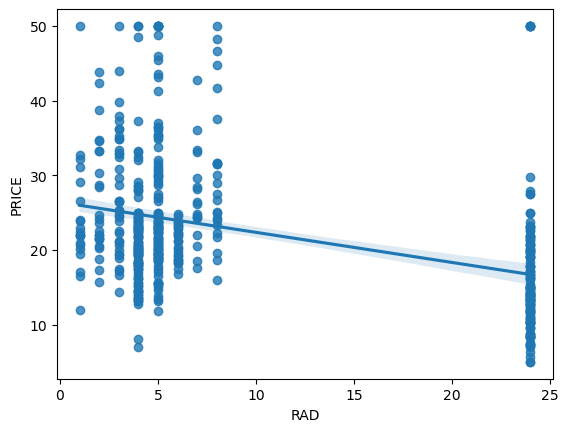

In [24]:
sns.regplot(x="RAD",y="PRICE",data=df)

<AxesSubplot:xlabel='TAX', ylabel='PRICE'>

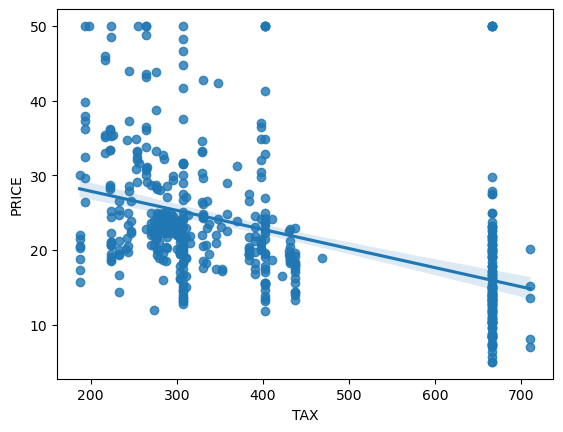

In [25]:
sns.regplot(x="TAX",y="PRICE",data=df)

<AxesSubplot:xlabel='PTRATIO', ylabel='PRICE'>

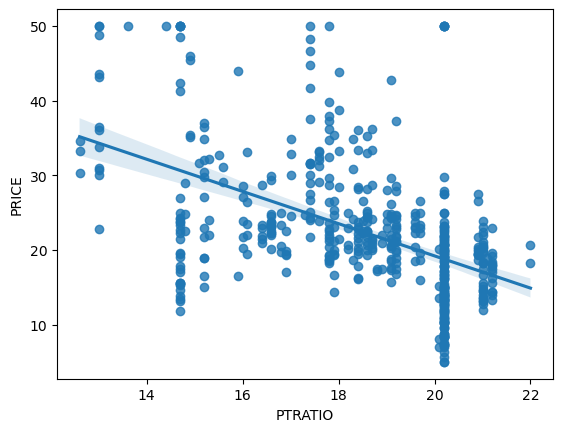

In [26]:
sns.regplot(x="PTRATIO",y="PRICE",data=df)

<AxesSubplot:xlabel='B', ylabel='PRICE'>

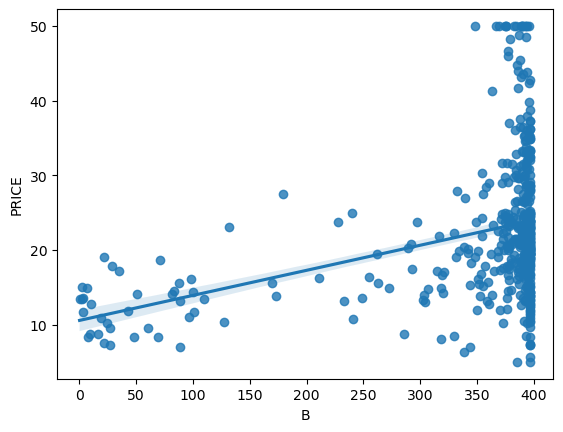

In [27]:
sns.regplot(x="B",y="PRICE",data=df)

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

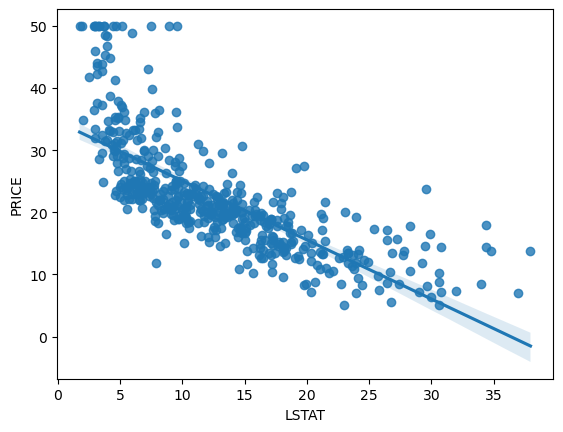

In [28]:
sns.regplot(x="LSTAT",y="PRICE",data=df)

# Data Preparation

In [29]:
x = df.drop("PRICE",axis=1)

y = df['PRICE']

In [30]:
x

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [31]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [33]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(506, 13)
(404, 13)
(102, 13)


In [34]:
ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test  = ss.transform(x_test)

In [35]:
x_train

array([[-0.42054453,  0.41117689, -0.84923313, ..., -0.81846496,
         0.44047695,  0.05497058],
       [ 1.05813   , -0.47409775,  0.94239807, ...,  0.77079638,
        -2.32930526,  0.03795721],
       [-0.25278198, -0.47409775, -0.48975657, ...,  1.14474022,
        -1.10359222,  1.03182129],
       ...,
       [-0.16849289, -0.47409775,  0.94239807, ...,  0.77079638,
         0.18010861,  0.03937499],
       [-0.41170669, -0.47409775,  2.02801729, ...,  0.25662359,
         0.3299541 ,  0.24778871],
       [-0.34647689,  0.36902095, -1.08936348, ..., -2.59469822,
         0.40734107, -0.37036355]])

In [36]:
x_test

array([[-0.42428043,  0.91704811, -1.3467487 , ..., -0.07057727,
         0.41740766, -0.58586618],
       [-0.42790407,  2.05525837, -1.23890573, ..., -1.37938073,
         0.41751252, -1.13880054],
       [-0.42636633,  2.89837708, -1.17563785, ..., -1.14566583,
         0.45452824, -1.18984064],
       ...,
       [-0.41621972, -0.47409775, -0.4293645 , ...,  1.09799724,
         0.43712142, -0.11232751],
       [-0.41898478,  0.79058031, -0.95132447, ..., -0.91195092,
         0.20129041, -0.26119446],
       [-0.40513088, -0.47409775, -0.4293645 , ...,  1.09799724,
        -2.96496891, -0.3448435 ]])

# Model Training

# Linear Regression

In [87]:
from catboost import CatBoostRegressor

lr = CatBoostRegressor()

param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.1, 0.01, 0.001],
    'l2_leaf_reg': [1, 3, 5, 7],
    'bagging_temperature': [0.5, 1, 1.5],
    'random_strength': [0.5, 1, 1.5],
    'border_count': [32, 64, 128],
    'iterations': [100, 200, 300],
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=5)

In [88]:
random_search.fit(x_train,y_train)

0:	learn: 8.8171129	total: 664us	remaining: 65.8ms
1:	learn: 8.8118132	total: 4.79ms	remaining: 235ms
2:	learn: 8.8059022	total: 7.55ms	remaining: 244ms
3:	learn: 8.8003776	total: 10.1ms	remaining: 243ms
4:	learn: 8.7944391	total: 13.5ms	remaining: 256ms
5:	learn: 8.7883358	total: 16.1ms	remaining: 253ms
6:	learn: 8.7826802	total: 18ms	remaining: 239ms
7:	learn: 8.7766810	total: 19.9ms	remaining: 229ms
8:	learn: 8.7716272	total: 21.8ms	remaining: 220ms
9:	learn: 8.7664993	total: 23.6ms	remaining: 213ms
10:	learn: 8.7610131	total: 25.5ms	remaining: 206ms
11:	learn: 8.7554662	total: 27.4ms	remaining: 201ms
12:	learn: 8.7502381	total: 29.3ms	remaining: 196ms
13:	learn: 8.7446368	total: 31.1ms	remaining: 191ms
14:	learn: 8.7393260	total: 32.9ms	remaining: 186ms
15:	learn: 8.7330435	total: 34.7ms	remaining: 182ms
16:	learn: 8.7276397	total: 36.4ms	remaining: 178ms
17:	learn: 8.7220463	total: 38.4ms	remaining: 175ms
18:	learn: 8.7173826	total: 40.2ms	remaining: 171ms
19:	learn: 8.7120775	tot

9:	learn: 8.4830777	total: 19.7ms	remaining: 177ms
10:	learn: 8.4783583	total: 22ms	remaining: 178ms
11:	learn: 8.4733587	total: 24ms	remaining: 176ms
12:	learn: 8.4686215	total: 26ms	remaining: 174ms
13:	learn: 8.4631457	total: 27.9ms	remaining: 171ms
14:	learn: 8.4577972	total: 29.7ms	remaining: 168ms
15:	learn: 8.4521143	total: 31.4ms	remaining: 165ms
16:	learn: 8.4464296	total: 33.3ms	remaining: 163ms
17:	learn: 8.4410895	total: 35.5ms	remaining: 162ms
18:	learn: 8.4357163	total: 37.5ms	remaining: 160ms
19:	learn: 8.4314637	total: 40ms	remaining: 160ms
20:	learn: 8.4257816	total: 42ms	remaining: 158ms
21:	learn: 8.4207528	total: 43.8ms	remaining: 155ms
22:	learn: 8.4160076	total: 45.8ms	remaining: 153ms
23:	learn: 8.4117534	total: 47.9ms	remaining: 152ms
24:	learn: 8.4060728	total: 49.9ms	remaining: 150ms
25:	learn: 8.4006255	total: 51.9ms	remaining: 148ms
26:	learn: 8.3952400	total: 53.9ms	remaining: 146ms
27:	learn: 8.3902027	total: 55.9ms	remaining: 144ms
28:	learn: 8.3861391	to

24:	learn: 8.6517772	total: 43.2ms	remaining: 130ms
25:	learn: 8.6461922	total: 45.1ms	remaining: 128ms
26:	learn: 8.6408357	total: 46.8ms	remaining: 126ms
27:	learn: 8.6347654	total: 48.4ms	remaining: 124ms
28:	learn: 8.6296463	total: 50.1ms	remaining: 123ms
29:	learn: 8.6238220	total: 51.6ms	remaining: 120ms
30:	learn: 8.6179397	total: 53.3ms	remaining: 119ms
31:	learn: 8.6121086	total: 54.9ms	remaining: 117ms
32:	learn: 8.6063918	total: 56.5ms	remaining: 115ms
33:	learn: 8.6003689	total: 58.3ms	remaining: 113ms
34:	learn: 8.5942866	total: 60.1ms	remaining: 112ms
35:	learn: 8.5887202	total: 62.1ms	remaining: 110ms
36:	learn: 8.5828734	total: 63.9ms	remaining: 109ms
37:	learn: 8.5778887	total: 65.7ms	remaining: 107ms
38:	learn: 8.5722312	total: 68ms	remaining: 106ms
39:	learn: 8.5663677	total: 70ms	remaining: 105ms
40:	learn: 8.5609519	total: 71.9ms	remaining: 103ms
41:	learn: 8.5553083	total: 73.7ms	remaining: 102ms
42:	learn: 8.5497324	total: 75.4ms	remaining: 99.9ms
43:	learn: 8.54

188:	learn: 4.0858870	total: 247ms	remaining: 14.4ms
189:	learn: 4.0730358	total: 249ms	remaining: 13.1ms
190:	learn: 4.0628362	total: 250ms	remaining: 11.8ms
191:	learn: 4.0518060	total: 252ms	remaining: 10.5ms
192:	learn: 4.0414588	total: 253ms	remaining: 9.17ms
193:	learn: 4.0300092	total: 254ms	remaining: 7.86ms
194:	learn: 4.0186405	total: 256ms	remaining: 6.55ms
195:	learn: 4.0071051	total: 257ms	remaining: 5.24ms
196:	learn: 3.9986593	total: 258ms	remaining: 3.93ms
197:	learn: 3.9855273	total: 260ms	remaining: 2.62ms
198:	learn: 3.9734609	total: 261ms	remaining: 1.31ms
199:	learn: 3.9628928	total: 262ms	remaining: 0us
0:	learn: 8.8801633	total: 1.84ms	remaining: 366ms
1:	learn: 8.8296280	total: 3.41ms	remaining: 338ms
2:	learn: 8.7840994	total: 4.82ms	remaining: 316ms
3:	learn: 8.7393015	total: 6.1ms	remaining: 299ms
4:	learn: 8.6940800	total: 7.43ms	remaining: 290ms
5:	learn: 8.6492460	total: 8.95ms	remaining: 290ms
6:	learn: 8.5977386	total: 10.3ms	remaining: 283ms
7:	learn: 8

61:	learn: 6.3615936	total: 81.8ms	remaining: 182ms
62:	learn: 6.3290087	total: 83.2ms	remaining: 181ms
63:	learn: 6.3004465	total: 84.8ms	remaining: 180ms
64:	learn: 6.2686161	total: 86.3ms	remaining: 179ms
65:	learn: 6.2364258	total: 87.7ms	remaining: 178ms
66:	learn: 6.2125995	total: 89ms	remaining: 177ms
67:	learn: 6.1898254	total: 90.4ms	remaining: 175ms
68:	learn: 6.1646923	total: 91.8ms	remaining: 174ms
69:	learn: 6.1381809	total: 93ms	remaining: 173ms
70:	learn: 6.1141077	total: 94.5ms	remaining: 172ms
71:	learn: 6.0878773	total: 95.8ms	remaining: 170ms
72:	learn: 6.0570582	total: 97.3ms	remaining: 169ms
73:	learn: 6.0303119	total: 98.7ms	remaining: 168ms
74:	learn: 6.0040579	total: 101ms	remaining: 168ms
75:	learn: 5.9788241	total: 102ms	remaining: 167ms
76:	learn: 5.9511869	total: 104ms	remaining: 166ms
77:	learn: 5.9296609	total: 105ms	remaining: 165ms
78:	learn: 5.9036586	total: 107ms	remaining: 164ms
79:	learn: 5.8774055	total: 109ms	remaining: 163ms
80:	learn: 5.8519414	t

163:	learn: 4.3805788	total: 199ms	remaining: 43.7ms
164:	learn: 4.3656205	total: 201ms	remaining: 42.6ms
165:	learn: 4.3524970	total: 202ms	remaining: 41.5ms
166:	learn: 4.3360865	total: 204ms	remaining: 40.3ms
167:	learn: 4.3212054	total: 205ms	remaining: 39.1ms
168:	learn: 4.3078336	total: 207ms	remaining: 37.9ms
169:	learn: 4.2921904	total: 208ms	remaining: 36.8ms
170:	learn: 4.2791240	total: 210ms	remaining: 35.6ms
171:	learn: 4.2665196	total: 211ms	remaining: 34.4ms
172:	learn: 4.2542427	total: 212ms	remaining: 33.1ms
173:	learn: 4.2394927	total: 213ms	remaining: 31.8ms
174:	learn: 4.2270070	total: 214ms	remaining: 30.6ms
175:	learn: 4.2108459	total: 216ms	remaining: 29.4ms
176:	learn: 4.1968009	total: 217ms	remaining: 28.2ms
177:	learn: 4.1826667	total: 218ms	remaining: 27ms
178:	learn: 4.1662259	total: 220ms	remaining: 25.8ms
179:	learn: 4.1544398	total: 221ms	remaining: 24.6ms
180:	learn: 4.1413995	total: 223ms	remaining: 23.4ms
181:	learn: 4.1269644	total: 224ms	remaining: 22

58:	learn: 8.5302994	total: 50.4ms	remaining: 120ms
59:	learn: 8.5256427	total: 51.4ms	remaining: 120ms
60:	learn: 8.5209819	total: 52.5ms	remaining: 120ms
61:	learn: 8.5163176	total: 53.4ms	remaining: 119ms
62:	learn: 8.5118033	total: 54.5ms	remaining: 118ms
63:	learn: 8.5067591	total: 55.4ms	remaining: 118ms
64:	learn: 8.5017413	total: 56.3ms	remaining: 117ms
65:	learn: 8.4966268	total: 57.1ms	remaining: 116ms
66:	learn: 8.4918185	total: 58.1ms	remaining: 115ms
67:	learn: 8.4866971	total: 59.1ms	remaining: 115ms
68:	learn: 8.4812183	total: 59.9ms	remaining: 114ms
69:	learn: 8.4764258	total: 60.8ms	remaining: 113ms
70:	learn: 8.4713199	total: 61.8ms	remaining: 112ms
71:	learn: 8.4664577	total: 62.8ms	remaining: 112ms
72:	learn: 8.4620953	total: 63.7ms	remaining: 111ms
73:	learn: 8.4568863	total: 64.5ms	remaining: 110ms
74:	learn: 8.4516906	total: 65.6ms	remaining: 109ms
75:	learn: 8.4467578	total: 66.2ms	remaining: 108ms
76:	learn: 8.4419970	total: 67.2ms	remaining: 107ms
77:	learn: 8

44:	learn: 8.7010487	total: 43.8ms	remaining: 151ms
45:	learn: 8.6962737	total: 44.9ms	remaining: 150ms
46:	learn: 8.6912101	total: 46.1ms	remaining: 150ms
47:	learn: 8.6866349	total: 47.1ms	remaining: 149ms
48:	learn: 8.6814380	total: 47.5ms	remaining: 146ms
49:	learn: 8.6760092	total: 48.4ms	remaining: 145ms
50:	learn: 8.6709539	total: 49.2ms	remaining: 144ms
51:	learn: 8.6663239	total: 50.3ms	remaining: 143ms
52:	learn: 8.6615593	total: 51.4ms	remaining: 143ms
53:	learn: 8.6565367	total: 52.3ms	remaining: 141ms
54:	learn: 8.6517269	total: 53.2ms	remaining: 140ms
55:	learn: 8.6465179	total: 54.1ms	remaining: 139ms
56:	learn: 8.6413529	total: 54.9ms	remaining: 138ms
57:	learn: 8.6368112	total: 55.7ms	remaining: 136ms
58:	learn: 8.6314429	total: 56.5ms	remaining: 135ms
59:	learn: 8.6269304	total: 57.4ms	remaining: 134ms
60:	learn: 8.6221106	total: 58.4ms	remaining: 133ms
61:	learn: 8.6171646	total: 59.3ms	remaining: 132ms
62:	learn: 8.6123938	total: 60.4ms	remaining: 131ms
63:	learn: 8

32:	learn: 8.3781296	total: 29.2ms	remaining: 148ms
33:	learn: 8.3734836	total: 30.2ms	remaining: 147ms
34:	learn: 8.3688956	total: 31.1ms	remaining: 147ms
35:	learn: 8.3644115	total: 32ms	remaining: 146ms
36:	learn: 8.3596144	total: 32.9ms	remaining: 145ms
37:	learn: 8.3549711	total: 34.2ms	remaining: 146ms
38:	learn: 8.3508611	total: 35.2ms	remaining: 145ms
39:	learn: 8.3465869	total: 36.2ms	remaining: 145ms
40:	learn: 8.3422127	total: 37.2ms	remaining: 144ms
41:	learn: 8.3376728	total: 38ms	remaining: 143ms
42:	learn: 8.3332257	total: 39.1ms	remaining: 143ms
43:	learn: 8.3286932	total: 40.1ms	remaining: 142ms
44:	learn: 8.3236202	total: 41.1ms	remaining: 141ms
45:	learn: 8.3192052	total: 42.1ms	remaining: 141ms
46:	learn: 8.3147368	total: 43.1ms	remaining: 140ms
47:	learn: 8.3105876	total: 44.1ms	remaining: 140ms
48:	learn: 8.3057030	total: 44.5ms	remaining: 137ms
49:	learn: 8.3011275	total: 45.5ms	remaining: 136ms
50:	learn: 8.2965386	total: 46.4ms	remaining: 136ms
51:	learn: 8.292

11:	learn: 8.7073945	total: 12ms	remaining: 188ms
12:	learn: 8.7021668	total: 13.4ms	remaining: 192ms
13:	learn: 8.6969485	total: 14.4ms	remaining: 191ms
14:	learn: 8.6919496	total: 15.4ms	remaining: 189ms
15:	learn: 8.6870202	total: 16.5ms	remaining: 190ms
16:	learn: 8.6822115	total: 17.4ms	remaining: 187ms
17:	learn: 8.6770027	total: 18.3ms	remaining: 185ms
18:	learn: 8.6721652	total: 19.2ms	remaining: 183ms
19:	learn: 8.6675034	total: 20.2ms	remaining: 182ms
20:	learn: 8.6624131	total: 21.1ms	remaining: 180ms
21:	learn: 8.6577325	total: 22ms	remaining: 178ms
22:	learn: 8.6530512	total: 23ms	remaining: 177ms
23:	learn: 8.6481991	total: 24ms	remaining: 176ms
24:	learn: 8.6432700	total: 25ms	remaining: 175ms
25:	learn: 8.6377373	total: 25.3ms	remaining: 170ms
26:	learn: 8.6326563	total: 26.4ms	remaining: 169ms
27:	learn: 8.6285045	total: 27.4ms	remaining: 168ms
28:	learn: 8.6240360	total: 28.3ms	remaining: 167ms
29:	learn: 8.6188330	total: 29.2ms	remaining: 166ms
30:	learn: 8.6137853	t

2:	learn: 8.7797941	total: 3.04ms	remaining: 199ms
3:	learn: 8.7743997	total: 4.25ms	remaining: 208ms
4:	learn: 8.7690543	total: 5.39ms	remaining: 210ms
5:	learn: 8.7633433	total: 6.42ms	remaining: 208ms
6:	learn: 8.7582572	total: 7.42ms	remaining: 204ms
7:	learn: 8.7530866	total: 8.38ms	remaining: 201ms
8:	learn: 8.7476757	total: 9.39ms	remaining: 199ms
9:	learn: 8.7421127	total: 10.3ms	remaining: 195ms
10:	learn: 8.7371857	total: 11.3ms	remaining: 193ms
11:	learn: 8.7320491	total: 12.3ms	remaining: 192ms
12:	learn: 8.7264381	total: 12.9ms	remaining: 185ms
13:	learn: 8.7211397	total: 13.9ms	remaining: 185ms
14:	learn: 8.7159990	total: 14.9ms	remaining: 184ms
15:	learn: 8.7110464	total: 15.9ms	remaining: 182ms
16:	learn: 8.7061878	total: 16.9ms	remaining: 182ms
17:	learn: 8.7011836	total: 18ms	remaining: 182ms
18:	learn: 8.6958483	total: 19ms	remaining: 181ms
19:	learn: 8.6907599	total: 19.9ms	remaining: 179ms
20:	learn: 8.6849338	total: 20.9ms	remaining: 178ms
21:	learn: 8.6798123	tot

13:	learn: 8.7426438	total: 11.9ms	remaining: 72.9ms
14:	learn: 8.7377242	total: 13ms	remaining: 73.7ms
15:	learn: 8.7320608	total: 14ms	remaining: 73.7ms
16:	learn: 8.7262161	total: 15ms	remaining: 73.3ms
17:	learn: 8.7209369	total: 15.8ms	remaining: 72ms
18:	learn: 8.7148778	total: 16.6ms	remaining: 70.9ms
19:	learn: 8.7091240	total: 17.5ms	remaining: 70ms
20:	learn: 8.7037586	total: 18.3ms	remaining: 68.9ms
21:	learn: 8.6985235	total: 19.2ms	remaining: 68.1ms
22:	learn: 8.6936189	total: 20ms	remaining: 67.1ms
23:	learn: 8.6883432	total: 20.9ms	remaining: 66.2ms
24:	learn: 8.6822894	total: 21.7ms	remaining: 65ms
25:	learn: 8.6775217	total: 22.4ms	remaining: 63.9ms
26:	learn: 8.6722602	total: 23.3ms	remaining: 63.1ms
27:	learn: 8.6677434	total: 24.1ms	remaining: 62ms
28:	learn: 8.6616816	total: 25ms	remaining: 61.2ms
29:	learn: 8.6560415	total: 25.9ms	remaining: 60.4ms
30:	learn: 8.6498432	total: 26.6ms	remaining: 59.2ms
31:	learn: 8.6441253	total: 27.2ms	remaining: 57.8ms
32:	learn: 

34:	learn: 8.3489114	total: 25ms	remaining: 46.4ms
35:	learn: 8.3437327	total: 25.8ms	remaining: 45.9ms
36:	learn: 8.3386872	total: 26.5ms	remaining: 45.2ms
37:	learn: 8.3340144	total: 27.3ms	remaining: 44.5ms
38:	learn: 8.3283639	total: 28ms	remaining: 43.9ms
39:	learn: 8.3228223	total: 28.8ms	remaining: 43.2ms
40:	learn: 8.3184008	total: 29.7ms	remaining: 42.8ms
41:	learn: 8.3131576	total: 30.5ms	remaining: 42.1ms
42:	learn: 8.3090060	total: 31.2ms	remaining: 41.4ms
43:	learn: 8.3034764	total: 32ms	remaining: 40.7ms
44:	learn: 8.2987688	total: 32.9ms	remaining: 40.3ms
45:	learn: 8.2932674	total: 33.8ms	remaining: 39.7ms
46:	learn: 8.2883169	total: 34.6ms	remaining: 39ms
47:	learn: 8.2829451	total: 35.4ms	remaining: 38.4ms
48:	learn: 8.2771901	total: 36.2ms	remaining: 37.7ms
49:	learn: 8.2724879	total: 36.9ms	remaining: 36.9ms
50:	learn: 8.2671724	total: 37.8ms	remaining: 36.3ms
51:	learn: 8.2619284	total: 38.6ms	remaining: 35.7ms
52:	learn: 8.2562248	total: 39.4ms	remaining: 34.9ms
5

56:	learn: 8.4671198	total: 39.5ms	remaining: 29.8ms
57:	learn: 8.4614786	total: 40.3ms	remaining: 29.2ms
58:	learn: 8.4559877	total: 41.2ms	remaining: 28.6ms
59:	learn: 8.4503362	total: 42.1ms	remaining: 28.1ms
60:	learn: 8.4445788	total: 42.9ms	remaining: 27.4ms
61:	learn: 8.4386724	total: 43.6ms	remaining: 26.7ms
62:	learn: 8.4329968	total: 44.4ms	remaining: 26.1ms
63:	learn: 8.4273180	total: 45.2ms	remaining: 25.4ms
64:	learn: 8.4219695	total: 45.9ms	remaining: 24.7ms
65:	learn: 8.4167742	total: 46.7ms	remaining: 24.1ms
66:	learn: 8.4107116	total: 47.7ms	remaining: 23.5ms
67:	learn: 8.4056942	total: 48.4ms	remaining: 22.8ms
68:	learn: 8.4004447	total: 49.1ms	remaining: 22.1ms
69:	learn: 8.3949384	total: 49.9ms	remaining: 21.4ms
70:	learn: 8.3892903	total: 50.6ms	remaining: 20.7ms
71:	learn: 8.3839762	total: 51.3ms	remaining: 20ms
72:	learn: 8.3784597	total: 52.1ms	remaining: 19.3ms
73:	learn: 8.3728690	total: 53.3ms	remaining: 18.7ms
74:	learn: 8.3673549	total: 54.1ms	remaining: 18

49:	learn: 7.1250061	total: 41ms	remaining: 41ms
50:	learn: 7.0939046	total: 42.3ms	remaining: 40.6ms
51:	learn: 7.0634859	total: 43.1ms	remaining: 39.8ms
52:	learn: 7.0326608	total: 44ms	remaining: 39ms
53:	learn: 7.0069393	total: 44.9ms	remaining: 38.2ms
54:	learn: 6.9781558	total: 45.6ms	remaining: 37.3ms
55:	learn: 6.9485400	total: 46.5ms	remaining: 36.5ms
56:	learn: 6.9202716	total: 47.3ms	remaining: 35.7ms
57:	learn: 6.8986997	total: 48.3ms	remaining: 35ms
58:	learn: 6.8775216	total: 49.2ms	remaining: 34.2ms
59:	learn: 6.8538220	total: 50.1ms	remaining: 33.4ms
60:	learn: 6.8295899	total: 51ms	remaining: 32.6ms
61:	learn: 6.8047654	total: 52ms	remaining: 31.8ms
62:	learn: 6.7781023	total: 52.9ms	remaining: 31.1ms
63:	learn: 6.7546459	total: 53.9ms	remaining: 30.3ms
64:	learn: 6.7248438	total: 55ms	remaining: 29.6ms
65:	learn: 6.6969965	total: 56ms	remaining: 28.9ms
66:	learn: 6.6728261	total: 57ms	remaining: 28.1ms
67:	learn: 6.6515114	total: 58.1ms	remaining: 27.3ms
68:	learn: 6.

23:	learn: 7.8380588	total: 21.4ms	remaining: 67.8ms
24:	learn: 7.8021491	total: 22.4ms	remaining: 67.3ms
25:	learn: 7.7714770	total: 23.3ms	remaining: 66.3ms
26:	learn: 7.7414994	total: 24.1ms	remaining: 65.1ms
27:	learn: 7.7085600	total: 24.9ms	remaining: 63.9ms
28:	learn: 7.6780662	total: 25.6ms	remaining: 62.7ms
29:	learn: 7.6446021	total: 26.4ms	remaining: 61.7ms
30:	learn: 7.6166161	total: 27.4ms	remaining: 60.9ms
31:	learn: 7.5853165	total: 28.3ms	remaining: 60.2ms
32:	learn: 7.5525016	total: 29.2ms	remaining: 59.2ms
33:	learn: 7.5197928	total: 30ms	remaining: 58.3ms
34:	learn: 7.4903652	total: 30.9ms	remaining: 57.3ms
35:	learn: 7.4555704	total: 31.8ms	remaining: 56.5ms
36:	learn: 7.4244232	total: 32.7ms	remaining: 55.7ms
37:	learn: 7.3994581	total: 33.8ms	remaining: 55.2ms
38:	learn: 7.3744021	total: 34.7ms	remaining: 54.3ms
39:	learn: 7.3378775	total: 35.7ms	remaining: 53.6ms
40:	learn: 7.3084925	total: 36.9ms	remaining: 53.1ms
41:	learn: 7.2786791	total: 37.8ms	remaining: 52

20:	learn: 7.7173861	total: 20.8ms	remaining: 78.4ms
21:	learn: 7.6714317	total: 21.9ms	remaining: 77.5ms
22:	learn: 7.6258161	total: 23ms	remaining: 76.9ms
23:	learn: 7.5765255	total: 23.9ms	remaining: 75.7ms
24:	learn: 7.5342708	total: 24.8ms	remaining: 74.4ms
25:	learn: 7.4893823	total: 25.8ms	remaining: 73.4ms
26:	learn: 7.4422935	total: 26.8ms	remaining: 72.5ms
27:	learn: 7.4030328	total: 27.8ms	remaining: 71.4ms
28:	learn: 7.3546867	total: 28.9ms	remaining: 70.7ms
29:	learn: 7.3063996	total: 30ms	remaining: 69.9ms
30:	learn: 7.2669921	total: 30.9ms	remaining: 68.8ms
31:	learn: 7.2201056	total: 32ms	remaining: 67.9ms
32:	learn: 7.1757093	total: 33ms	remaining: 67ms
33:	learn: 7.1342207	total: 34ms	remaining: 66.1ms
34:	learn: 7.0907132	total: 35.1ms	remaining: 65.3ms
35:	learn: 7.0509990	total: 36.3ms	remaining: 64.5ms
36:	learn: 7.0061723	total: 37.2ms	remaining: 63.4ms
37:	learn: 6.9652938	total: 38.2ms	remaining: 62.3ms
38:	learn: 6.9270786	total: 39ms	remaining: 61ms
39:	learn

0:	learn: 8.4818812	total: 1.44ms	remaining: 143ms
1:	learn: 8.4259619	total: 2.77ms	remaining: 136ms
2:	learn: 8.3702665	total: 3.86ms	remaining: 125ms
3:	learn: 8.3207817	total: 4.99ms	remaining: 120ms
4:	learn: 8.2688711	total: 5.99ms	remaining: 114ms
5:	learn: 8.2121716	total: 6.82ms	remaining: 107ms
6:	learn: 8.1564121	total: 7.69ms	remaining: 102ms
7:	learn: 8.1052526	total: 8.67ms	remaining: 99.8ms
8:	learn: 8.0518667	total: 9.66ms	remaining: 97.7ms
9:	learn: 8.0036197	total: 10.6ms	remaining: 95ms
10:	learn: 7.9618007	total: 11ms	remaining: 88.9ms
11:	learn: 7.9109073	total: 11.9ms	remaining: 87.4ms
12:	learn: 7.8640267	total: 12.9ms	remaining: 86.1ms
13:	learn: 7.8164778	total: 13.7ms	remaining: 84.1ms
14:	learn: 7.7680835	total: 14.5ms	remaining: 82ms
15:	learn: 7.7200848	total: 15.2ms	remaining: 80ms
16:	learn: 7.6693079	total: 16.1ms	remaining: 78.4ms
17:	learn: 7.6209762	total: 16.8ms	remaining: 76.6ms
18:	learn: 7.5706319	total: 17.6ms	remaining: 75.1ms
19:	learn: 7.52400

0:	learn: 8.7363138	total: 1.21ms	remaining: 120ms
1:	learn: 8.6723024	total: 1.99ms	remaining: 97.6ms
2:	learn: 8.6082029	total: 2.97ms	remaining: 96.2ms
3:	learn: 8.5533082	total: 4.13ms	remaining: 99.1ms
4:	learn: 8.4967582	total: 5.24ms	remaining: 99.6ms
5:	learn: 8.4374290	total: 6.23ms	remaining: 97.7ms
6:	learn: 8.3835319	total: 7.21ms	remaining: 95.7ms
7:	learn: 8.3325760	total: 8.19ms	remaining: 94.2ms
8:	learn: 8.2755240	total: 9.08ms	remaining: 91.8ms
9:	learn: 8.2190408	total: 10.1ms	remaining: 90.8ms
10:	learn: 8.1612861	total: 11ms	remaining: 89.2ms
11:	learn: 8.1061884	total: 11.9ms	remaining: 87.5ms
12:	learn: 8.0528627	total: 12.8ms	remaining: 85.3ms
13:	learn: 7.9981926	total: 13.6ms	remaining: 83.3ms
14:	learn: 7.9458303	total: 14.4ms	remaining: 81.7ms
15:	learn: 7.8975663	total: 15.3ms	remaining: 80.1ms
16:	learn: 7.8455680	total: 16ms	remaining: 78.3ms
17:	learn: 7.7914831	total: 16.9ms	remaining: 76.8ms
18:	learn: 7.7395338	total: 17.7ms	remaining: 75.4ms
19:	lear

0:	learn: 8.3832506	total: 618us	remaining: 123ms
1:	learn: 7.9382184	total: 1.23ms	remaining: 122ms
2:	learn: 7.6148412	total: 1.65ms	remaining: 108ms
3:	learn: 7.2600867	total: 2.02ms	remaining: 98.9ms
4:	learn: 6.9778312	total: 2.45ms	remaining: 95.5ms
5:	learn: 6.6220394	total: 2.9ms	remaining: 93.8ms
6:	learn: 6.2615744	total: 3.36ms	remaining: 92.6ms
7:	learn: 5.9877443	total: 3.79ms	remaining: 90.9ms
8:	learn: 5.7371871	total: 4.23ms	remaining: 89.9ms
9:	learn: 5.4904398	total: 4.68ms	remaining: 88.9ms
10:	learn: 5.2729997	total: 5.23ms	remaining: 89.9ms
11:	learn: 5.0819072	total: 5.76ms	remaining: 90.3ms
12:	learn: 4.8725110	total: 6.24ms	remaining: 89.7ms
13:	learn: 4.7097871	total: 6.7ms	remaining: 89ms
14:	learn: 4.5623728	total: 7.18ms	remaining: 88.6ms
15:	learn: 4.4192791	total: 7.59ms	remaining: 87.3ms
16:	learn: 4.2782101	total: 7.99ms	remaining: 86ms
17:	learn: 4.1586269	total: 8.4ms	remaining: 85ms
18:	learn: 4.0438533	total: 8.76ms	remaining: 83.5ms
19:	learn: 3.963

0:	learn: 8.2299491	total: 655us	remaining: 131ms
1:	learn: 7.7996691	total: 1.22ms	remaining: 121ms
2:	learn: 7.3889016	total: 1.7ms	remaining: 112ms
3:	learn: 7.0307873	total: 2.15ms	remaining: 105ms
4:	learn: 6.7053897	total: 2.56ms	remaining: 100ms
5:	learn: 6.3971506	total: 2.99ms	remaining: 96.7ms
6:	learn: 6.1073891	total: 3.41ms	remaining: 94.1ms
7:	learn: 5.8490213	total: 3.77ms	remaining: 90.6ms
8:	learn: 5.6035329	total: 4.22ms	remaining: 89.5ms
9:	learn: 5.3857086	total: 4.65ms	remaining: 88.4ms
10:	learn: 5.1645475	total: 5.07ms	remaining: 87.1ms
11:	learn: 4.9740396	total: 5.5ms	remaining: 86.2ms
12:	learn: 4.7856702	total: 5.92ms	remaining: 85.2ms
13:	learn: 4.6664560	total: 6.3ms	remaining: 83.7ms
14:	learn: 4.5294586	total: 6.75ms	remaining: 83.3ms
15:	learn: 4.4117475	total: 7.16ms	remaining: 82.3ms
16:	learn: 4.2805765	total: 7.58ms	remaining: 81.6ms
17:	learn: 4.1910343	total: 7.98ms	remaining: 80.7ms
18:	learn: 4.0515249	total: 8.43ms	remaining: 80.3ms
19:	learn: 3

6:	learn: 5.6632439	total: 6.76ms	remaining: 89.9ms
7:	learn: 5.4095345	total: 7.82ms	remaining: 89.9ms
8:	learn: 5.1242910	total: 8.84ms	remaining: 89.3ms
9:	learn: 4.8467237	total: 9.9ms	remaining: 89.1ms
10:	learn: 4.5771904	total: 10.8ms	remaining: 87.7ms
11:	learn: 4.3517640	total: 11.9ms	remaining: 87.5ms
12:	learn: 4.1797253	total: 13ms	remaining: 87ms
13:	learn: 4.0187383	total: 14ms	remaining: 86.1ms
14:	learn: 3.8489849	total: 15.1ms	remaining: 85.3ms
15:	learn: 3.7126058	total: 16ms	remaining: 84.1ms
16:	learn: 3.5919237	total: 17ms	remaining: 83.1ms
17:	learn: 3.4705816	total: 17.9ms	remaining: 81.6ms
18:	learn: 3.3491825	total: 18.8ms	remaining: 80.1ms
19:	learn: 3.2453421	total: 19.8ms	remaining: 79.1ms
20:	learn: 3.1388753	total: 20.7ms	remaining: 78ms
21:	learn: 3.0582860	total: 21.7ms	remaining: 76.8ms
22:	learn: 2.9999155	total: 22ms	remaining: 73.7ms
23:	learn: 2.9061044	total: 22.9ms	remaining: 72.5ms
24:	learn: 2.8026175	total: 23.8ms	remaining: 71.3ms
25:	learn: 2

0:	learn: 8.0049144	total: 1.6ms	remaining: 158ms
1:	learn: 7.5039178	total: 2.33ms	remaining: 114ms
2:	learn: 7.0313942	total: 3.37ms	remaining: 109ms
3:	learn: 6.6334439	total: 4.55ms	remaining: 109ms
4:	learn: 6.2628243	total: 5.6ms	remaining: 106ms
5:	learn: 5.9070273	total: 6.66ms	remaining: 104ms
6:	learn: 5.5942348	total: 7.72ms	remaining: 103ms
7:	learn: 5.2676609	total: 8.71ms	remaining: 100ms
8:	learn: 5.0035021	total: 10ms	remaining: 101ms
9:	learn: 4.7249260	total: 10.9ms	remaining: 98.5ms
10:	learn: 4.4795240	total: 11.9ms	remaining: 96.4ms
11:	learn: 4.2612796	total: 12.8ms	remaining: 93.8ms
12:	learn: 4.0868178	total: 13.7ms	remaining: 91.9ms
13:	learn: 3.9236186	total: 14.7ms	remaining: 90ms
14:	learn: 3.7591761	total: 15.5ms	remaining: 88ms
15:	learn: 3.5996976	total: 16.4ms	remaining: 86.3ms
16:	learn: 3.4333134	total: 17.3ms	remaining: 84.5ms
17:	learn: 3.3212660	total: 18.1ms	remaining: 82.5ms
18:	learn: 3.2066997	total: 19.1ms	remaining: 81.3ms
19:	learn: 3.1111309

0:	learn: 8.2014448	total: 1.2ms	remaining: 119ms
1:	learn: 7.6147862	total: 1.91ms	remaining: 93.8ms
2:	learn: 7.0937309	total: 2.97ms	remaining: 95.9ms
3:	learn: 6.6711718	total: 4.06ms	remaining: 97.4ms
4:	learn: 6.2675673	total: 5.07ms	remaining: 96.3ms
5:	learn: 5.8574311	total: 6.08ms	remaining: 95.2ms
6:	learn: 5.5016126	total: 7.15ms	remaining: 95ms
7:	learn: 5.2366789	total: 8.23ms	remaining: 94.6ms
8:	learn: 4.9407357	total: 9.1ms	remaining: 92ms
9:	learn: 4.6549768	total: 9.92ms	remaining: 89.3ms
10:	learn: 4.4169261	total: 10.7ms	remaining: 87ms
11:	learn: 4.1969218	total: 11.6ms	remaining: 84.9ms
12:	learn: 4.0250461	total: 12.5ms	remaining: 83.7ms
13:	learn: 3.8448891	total: 13.7ms	remaining: 83.9ms
14:	learn: 3.6693678	total: 14.6ms	remaining: 82.7ms
15:	learn: 3.5282392	total: 15.4ms	remaining: 81.1ms
16:	learn: 3.3953790	total: 16.3ms	remaining: 79.6ms
17:	learn: 3.2423985	total: 17.2ms	remaining: 78.5ms
18:	learn: 3.1265107	total: 18.1ms	remaining: 77.2ms
19:	learn: 3

94:	learn: 1.4348520	total: 83.4ms	remaining: 92.1ms
95:	learn: 1.4215631	total: 84.4ms	remaining: 91.4ms
96:	learn: 1.4086291	total: 85.4ms	remaining: 90.7ms
97:	learn: 1.4010343	total: 86.4ms	remaining: 89.9ms
98:	learn: 1.3916769	total: 87.4ms	remaining: 89.1ms
99:	learn: 1.3757739	total: 88.2ms	remaining: 88.2ms
100:	learn: 1.3627863	total: 89.1ms	remaining: 87.4ms
101:	learn: 1.3487551	total: 90.1ms	remaining: 86.6ms
102:	learn: 1.3332553	total: 91ms	remaining: 85.7ms
103:	learn: 1.3220526	total: 92ms	remaining: 84.9ms
104:	learn: 1.3132064	total: 93ms	remaining: 84.1ms
105:	learn: 1.2974388	total: 94ms	remaining: 83.3ms
106:	learn: 1.2918458	total: 94.9ms	remaining: 82.5ms
107:	learn: 1.2787329	total: 95.9ms	remaining: 81.7ms
108:	learn: 1.2690793	total: 96.8ms	remaining: 80.8ms
109:	learn: 1.2590814	total: 98ms	remaining: 80.1ms
110:	learn: 1.2468742	total: 98.9ms	remaining: 79.3ms
111:	learn: 1.2325021	total: 99.8ms	remaining: 78.4ms
112:	learn: 1.2157425	total: 101ms	remaining

88:	learn: 1.3647578	total: 76.9ms	remaining: 95.9ms
89:	learn: 1.3477404	total: 77.9ms	remaining: 95.3ms
90:	learn: 1.3362999	total: 79.2ms	remaining: 94.8ms
91:	learn: 1.3286804	total: 80.2ms	remaining: 94.1ms
92:	learn: 1.3143618	total: 81ms	remaining: 93.3ms
93:	learn: 1.3005532	total: 81.9ms	remaining: 92.4ms
94:	learn: 1.2837198	total: 82.8ms	remaining: 91.5ms
95:	learn: 1.2701796	total: 83.7ms	remaining: 90.7ms
96:	learn: 1.2589518	total: 84.5ms	remaining: 89.7ms
97:	learn: 1.2479490	total: 85.3ms	remaining: 88.8ms
98:	learn: 1.2357886	total: 86.1ms	remaining: 87.8ms
99:	learn: 1.2234502	total: 87ms	remaining: 87ms
100:	learn: 1.2170308	total: 87.9ms	remaining: 86.1ms
101:	learn: 1.2068336	total: 88.7ms	remaining: 85.2ms
102:	learn: 1.1958657	total: 89.6ms	remaining: 84.3ms
103:	learn: 1.1851955	total: 90.5ms	remaining: 83.5ms
104:	learn: 1.1721258	total: 91.4ms	remaining: 82.7ms
105:	learn: 1.1639323	total: 92.4ms	remaining: 82ms
106:	learn: 1.1543562	total: 93.4ms	remaining: 8

86:	learn: 1.4374187	total: 74.4ms	remaining: 96.6ms
87:	learn: 1.4224461	total: 75.4ms	remaining: 96ms
88:	learn: 1.4135591	total: 76.3ms	remaining: 95.1ms
89:	learn: 1.3984991	total: 77.2ms	remaining: 94.3ms
90:	learn: 1.3880763	total: 78.1ms	remaining: 93.5ms
91:	learn: 1.3699687	total: 79.1ms	remaining: 92.8ms
92:	learn: 1.3571254	total: 79.9ms	remaining: 91.9ms
93:	learn: 1.3422357	total: 80.7ms	remaining: 91ms
94:	learn: 1.3325776	total: 81.6ms	remaining: 90.2ms
95:	learn: 1.3208319	total: 82.4ms	remaining: 89.3ms
96:	learn: 1.3108711	total: 83.3ms	remaining: 88.5ms
97:	learn: 1.3028242	total: 84.1ms	remaining: 87.6ms
98:	learn: 1.2938224	total: 85.1ms	remaining: 86.8ms
99:	learn: 1.2825096	total: 86ms	remaining: 86ms
100:	learn: 1.2686512	total: 86.9ms	remaining: 85.1ms
101:	learn: 1.2581444	total: 87.7ms	remaining: 84.3ms
102:	learn: 1.2477124	total: 88.6ms	remaining: 83.4ms
103:	learn: 1.2357266	total: 89.5ms	remaining: 82.6ms
104:	learn: 1.2259819	total: 90.3ms	remaining: 81.

81:	learn: 1.4046015	total: 68.4ms	remaining: 98.5ms
82:	learn: 1.3858116	total: 69.4ms	remaining: 97.8ms
83:	learn: 1.3706655	total: 70.3ms	remaining: 97.1ms
84:	learn: 1.3553526	total: 71.3ms	remaining: 96.4ms
85:	learn: 1.3449038	total: 72.2ms	remaining: 95.7ms
86:	learn: 1.3305755	total: 73ms	remaining: 94.8ms
87:	learn: 1.3202470	total: 73.9ms	remaining: 94ms
88:	learn: 1.3090868	total: 74.7ms	remaining: 93.2ms
89:	learn: 1.2974617	total: 75.7ms	remaining: 92.5ms
90:	learn: 1.2861236	total: 76.6ms	remaining: 91.8ms
91:	learn: 1.2759254	total: 77.5ms	remaining: 90.9ms
92:	learn: 1.2570561	total: 78.5ms	remaining: 90.3ms
93:	learn: 1.2453311	total: 79.4ms	remaining: 89.5ms
94:	learn: 1.2349272	total: 80.4ms	remaining: 88.8ms
95:	learn: 1.2240644	total: 81.4ms	remaining: 88.2ms
96:	learn: 1.2132579	total: 82.3ms	remaining: 87.4ms
97:	learn: 1.2006176	total: 83.3ms	remaining: 86.7ms
98:	learn: 1.1880038	total: 84.3ms	remaining: 86ms
99:	learn: 1.1781523	total: 85.2ms	remaining: 85.2ms

80:	learn: 1.4398253	total: 70.9ms	remaining: 104ms
81:	learn: 1.4257152	total: 72ms	remaining: 104ms
82:	learn: 1.4109373	total: 73.4ms	remaining: 103ms
83:	learn: 1.3947194	total: 74.4ms	remaining: 103ms
84:	learn: 1.3826130	total: 75.4ms	remaining: 102ms
85:	learn: 1.3676341	total: 76.2ms	remaining: 101ms
86:	learn: 1.3585483	total: 77.1ms	remaining: 100ms
87:	learn: 1.3458903	total: 78.1ms	remaining: 99.4ms
88:	learn: 1.3373462	total: 79ms	remaining: 98.6ms
89:	learn: 1.3236513	total: 79.8ms	remaining: 97.5ms
90:	learn: 1.3131252	total: 80.6ms	remaining: 96.6ms
91:	learn: 1.2997923	total: 81.4ms	remaining: 95.6ms
92:	learn: 1.2869188	total: 82.3ms	remaining: 94.7ms
93:	learn: 1.2751755	total: 83.2ms	remaining: 93.8ms
94:	learn: 1.2635189	total: 84ms	remaining: 92.8ms
95:	learn: 1.2568691	total: 84.8ms	remaining: 91.9ms
96:	learn: 1.2450778	total: 85.7ms	remaining: 91ms
97:	learn: 1.2339866	total: 86.7ms	remaining: 90.2ms
98:	learn: 1.2282052	total: 87.6ms	remaining: 89.4ms
99:	lear

148:	learn: 4.2753383	total: 67.3ms	remaining: 68.2ms
149:	learn: 4.2601399	total: 68.1ms	remaining: 68.1ms
150:	learn: 4.2450932	total: 68.5ms	remaining: 67.6ms
151:	learn: 4.2305541	total: 69.1ms	remaining: 67.2ms
152:	learn: 4.2158963	total: 69.6ms	remaining: 66.9ms
153:	learn: 4.2018981	total: 70.2ms	remaining: 66.5ms
154:	learn: 4.1860411	total: 70.7ms	remaining: 66.2ms
155:	learn: 4.1727735	total: 71.3ms	remaining: 65.8ms
156:	learn: 4.1561100	total: 71.8ms	remaining: 65.4ms
157:	learn: 4.1459018	total: 72.2ms	remaining: 64.9ms
158:	learn: 4.1329637	total: 72.6ms	remaining: 64.4ms
159:	learn: 4.1197784	total: 73.1ms	remaining: 63.9ms
160:	learn: 4.1050057	total: 73.5ms	remaining: 63.5ms
161:	learn: 4.0922304	total: 74ms	remaining: 63ms
162:	learn: 4.0815687	total: 74.4ms	remaining: 62.5ms
163:	learn: 4.0659995	total: 74.8ms	remaining: 62.1ms
164:	learn: 4.0538955	total: 75.3ms	remaining: 61.6ms
165:	learn: 4.0402814	total: 75.7ms	remaining: 61.1ms
166:	learn: 4.0297600	total: 76.

208:	learn: 3.4821113	total: 98.7ms	remaining: 43ms
209:	learn: 3.4719467	total: 99.3ms	remaining: 42.6ms
210:	learn: 3.4606456	total: 99.8ms	remaining: 42.1ms
211:	learn: 3.4515109	total: 100ms	remaining: 41.6ms
212:	learn: 3.4411390	total: 101ms	remaining: 41.2ms
213:	learn: 3.4305406	total: 101ms	remaining: 40.7ms
214:	learn: 3.4192345	total: 102ms	remaining: 40.3ms
215:	learn: 3.4113610	total: 102ms	remaining: 39.8ms
216:	learn: 3.3977951	total: 103ms	remaining: 39.3ms
217:	learn: 3.3908882	total: 103ms	remaining: 38.8ms
218:	learn: 3.3823336	total: 104ms	remaining: 38.3ms
219:	learn: 3.3738656	total: 104ms	remaining: 37.9ms
220:	learn: 3.3636409	total: 105ms	remaining: 37.4ms
221:	learn: 3.3556869	total: 105ms	remaining: 36.9ms
222:	learn: 3.3438478	total: 106ms	remaining: 36.5ms
223:	learn: 3.3341708	total: 106ms	remaining: 36ms
224:	learn: 3.3259125	total: 107ms	remaining: 35.5ms
225:	learn: 3.3156133	total: 107ms	remaining: 35.1ms
226:	learn: 3.3045696	total: 108ms	remaining: 3

235:	learn: 3.1485058	total: 117ms	remaining: 31.9ms
236:	learn: 3.1394566	total: 118ms	remaining: 31.4ms
237:	learn: 3.1312299	total: 119ms	remaining: 30.9ms
238:	learn: 3.1270355	total: 119ms	remaining: 30.4ms
239:	learn: 3.1197424	total: 120ms	remaining: 30ms
240:	learn: 3.1106472	total: 120ms	remaining: 29.5ms
241:	learn: 3.1046118	total: 121ms	remaining: 29ms
242:	learn: 3.0973598	total: 122ms	remaining: 28.6ms
243:	learn: 3.0898465	total: 122ms	remaining: 28.1ms
244:	learn: 3.0827636	total: 123ms	remaining: 27.6ms
245:	learn: 3.0761730	total: 123ms	remaining: 27ms
246:	learn: 3.0713345	total: 123ms	remaining: 26.5ms
247:	learn: 3.0626379	total: 124ms	remaining: 26ms
248:	learn: 3.0546394	total: 124ms	remaining: 25.4ms
249:	learn: 3.0475516	total: 125ms	remaining: 24.9ms
250:	learn: 3.0400120	total: 125ms	remaining: 24.4ms
251:	learn: 3.0295526	total: 125ms	remaining: 23.9ms
252:	learn: 3.0230459	total: 126ms	remaining: 23.4ms
253:	learn: 3.0181384	total: 126ms	remaining: 22.9ms
2

293:	learn: 2.7207597	total: 138ms	remaining: 2.81ms
294:	learn: 2.7126747	total: 138ms	remaining: 2.35ms
295:	learn: 2.7086335	total: 139ms	remaining: 1.88ms
296:	learn: 2.7025670	total: 139ms	remaining: 1.41ms
297:	learn: 2.6982430	total: 140ms	remaining: 938us
298:	learn: 2.6939181	total: 141ms	remaining: 470us
299:	learn: 2.6901799	total: 141ms	remaining: 0us
0:	learn: 8.7402111	total: 634us	remaining: 190ms
1:	learn: 8.6792699	total: 1.08ms	remaining: 162ms
2:	learn: 8.6177260	total: 1.53ms	remaining: 152ms
3:	learn: 8.5613706	total: 1.98ms	remaining: 146ms
4:	learn: 8.5097944	total: 2.4ms	remaining: 142ms
5:	learn: 8.4609598	total: 2.83ms	remaining: 139ms
6:	learn: 8.4067754	total: 3.28ms	remaining: 137ms
7:	learn: 8.3549923	total: 3.7ms	remaining: 135ms
8:	learn: 8.3044851	total: 4.19ms	remaining: 136ms
9:	learn: 8.2482752	total: 4.68ms	remaining: 136ms
10:	learn: 8.1952011	total: 5.13ms	remaining: 135ms
11:	learn: 8.1449062	total: 5.56ms	remaining: 133ms
12:	learn: 8.0915150	to

13:	learn: 8.7587268	total: 8.36ms	remaining: 171ms
14:	learn: 8.7538775	total: 9.14ms	remaining: 174ms
15:	learn: 8.7494695	total: 9.82ms	remaining: 174ms
16:	learn: 8.7448522	total: 10.6ms	remaining: 177ms
17:	learn: 8.7402298	total: 11.2ms	remaining: 175ms
18:	learn: 8.7356388	total: 11.8ms	remaining: 174ms
19:	learn: 8.7307120	total: 12.2ms	remaining: 171ms
20:	learn: 8.7258577	total: 12.7ms	remaining: 169ms
21:	learn: 8.7219057	total: 13.2ms	remaining: 167ms
22:	learn: 8.7169978	total: 13.7ms	remaining: 165ms
23:	learn: 8.7125020	total: 14.2ms	remaining: 163ms
24:	learn: 8.7078523	total: 14.6ms	remaining: 161ms
25:	learn: 8.7035110	total: 15.1ms	remaining: 159ms
26:	learn: 8.6987315	total: 15.6ms	remaining: 157ms
27:	learn: 8.6947713	total: 16ms	remaining: 155ms
28:	learn: 8.6899243	total: 16.4ms	remaining: 153ms
29:	learn: 8.6855321	total: 16.9ms	remaining: 152ms
30:	learn: 8.6807183	total: 17.3ms	remaining: 150ms
31:	learn: 8.6767700	total: 17.7ms	remaining: 149ms
32:	learn: 8.6

62:	learn: 8.6464474	total: 29.8ms	remaining: 112ms
63:	learn: 8.6429067	total: 30.4ms	remaining: 112ms
64:	learn: 8.6393411	total: 30.9ms	remaining: 112ms
65:	learn: 8.6355549	total: 31.4ms	remaining: 111ms
66:	learn: 8.6312943	total: 31.9ms	remaining: 111ms
67:	learn: 8.6272391	total: 32.4ms	remaining: 110ms
68:	learn: 8.6231661	total: 32.8ms	remaining: 110ms
69:	learn: 8.6185977	total: 33.2ms	remaining: 109ms
70:	learn: 8.6146434	total: 33.6ms	remaining: 108ms
71:	learn: 8.6103419	total: 34.1ms	remaining: 108ms
72:	learn: 8.6061753	total: 34.5ms	remaining: 107ms
73:	learn: 8.6017236	total: 35ms	remaining: 107ms
74:	learn: 8.5976407	total: 35.4ms	remaining: 106ms
75:	learn: 8.5933591	total: 35.9ms	remaining: 106ms
76:	learn: 8.5888494	total: 36.5ms	remaining: 106ms
77:	learn: 8.5843083	total: 37ms	remaining: 105ms
78:	learn: 8.5800373	total: 37.6ms	remaining: 105ms
79:	learn: 8.5759124	total: 38ms	remaining: 105ms
80:	learn: 8.5714705	total: 38.6ms	remaining: 104ms
81:	learn: 8.56724

121:	learn: 8.0478896	total: 54.6ms	remaining: 79.7ms
122:	learn: 8.0442140	total: 55.3ms	remaining: 79.5ms
123:	learn: 8.0403081	total: 55.7ms	remaining: 79.1ms
124:	learn: 8.0361747	total: 56.3ms	remaining: 78.8ms
125:	learn: 8.0323331	total: 56.9ms	remaining: 78.6ms
126:	learn: 8.0283394	total: 57.6ms	remaining: 78.4ms
127:	learn: 8.0246196	total: 58.1ms	remaining: 78.1ms
128:	learn: 8.0210855	total: 58.6ms	remaining: 77.7ms
129:	learn: 8.0172958	total: 59ms	remaining: 77.2ms
130:	learn: 8.0130177	total: 59.5ms	remaining: 76.7ms
131:	learn: 8.0092224	total: 60ms	remaining: 76.3ms
132:	learn: 8.0056486	total: 60.4ms	remaining: 75.9ms
133:	learn: 8.0014165	total: 60.9ms	remaining: 75.4ms
134:	learn: 7.9980094	total: 61.3ms	remaining: 74.9ms
135:	learn: 7.9943090	total: 61.7ms	remaining: 74.4ms
136:	learn: 7.9902045	total: 62.2ms	remaining: 74ms
137:	learn: 7.9859893	total: 62.5ms	remaining: 73.3ms
138:	learn: 7.9823699	total: 62.9ms	remaining: 72.8ms
139:	learn: 7.9787636	total: 63.3m

168:	learn: 8.0689192	total: 88.5ms	remaining: 68.6ms
169:	learn: 8.0653002	total: 89.1ms	remaining: 68.2ms
170:	learn: 8.0613404	total: 89.6ms	remaining: 67.6ms
171:	learn: 8.0579089	total: 90.2ms	remaining: 67.1ms
172:	learn: 8.0545251	total: 90.7ms	remaining: 66.6ms
173:	learn: 8.0508403	total: 91.3ms	remaining: 66.1ms
174:	learn: 8.0467880	total: 91.9ms	remaining: 65.7ms
175:	learn: 8.0425755	total: 92.4ms	remaining: 65.1ms
176:	learn: 8.0384115	total: 92.9ms	remaining: 64.6ms
177:	learn: 8.0347240	total: 93.4ms	remaining: 64ms
178:	learn: 8.0306438	total: 94ms	remaining: 63.5ms
179:	learn: 8.0268369	total: 94.5ms	remaining: 63ms
180:	learn: 8.0229611	total: 95.1ms	remaining: 62.5ms
181:	learn: 8.0196496	total: 95.8ms	remaining: 62.1ms
182:	learn: 8.0158670	total: 96.4ms	remaining: 61.6ms
183:	learn: 8.0120527	total: 96.9ms	remaining: 61.1ms
184:	learn: 8.0079915	total: 97.4ms	remaining: 60.6ms
185:	learn: 8.0040699	total: 98ms	remaining: 60.1ms
186:	learn: 8.0002664	total: 98.6ms	

211:	learn: 7.8728411	total: 97.9ms	remaining: 40.6ms
212:	learn: 7.8684019	total: 98.6ms	remaining: 40.3ms
213:	learn: 7.8644855	total: 99.1ms	remaining: 39.8ms
214:	learn: 7.8609216	total: 99.8ms	remaining: 39.5ms
215:	learn: 7.8572170	total: 100ms	remaining: 39.1ms
216:	learn: 7.8531890	total: 101ms	remaining: 38.6ms
217:	learn: 7.8494145	total: 101ms	remaining: 38.2ms
218:	learn: 7.8450719	total: 102ms	remaining: 37.7ms
219:	learn: 7.8415632	total: 102ms	remaining: 37.2ms
220:	learn: 7.8373891	total: 103ms	remaining: 36.7ms
221:	learn: 7.8336485	total: 103ms	remaining: 36.2ms
222:	learn: 7.8295639	total: 104ms	remaining: 35.7ms
223:	learn: 7.8258391	total: 104ms	remaining: 35.3ms
224:	learn: 7.8216491	total: 104ms	remaining: 34.8ms
225:	learn: 7.8181105	total: 105ms	remaining: 34.3ms
226:	learn: 7.8140289	total: 105ms	remaining: 33.8ms
227:	learn: 7.8099388	total: 106ms	remaining: 33.4ms
228:	learn: 7.8056239	total: 106ms	remaining: 32.9ms
229:	learn: 7.8020370	total: 106ms	remaini

153:	learn: 8.2122718	total: 134ms	remaining: 127ms
154:	learn: 8.2088217	total: 136ms	remaining: 127ms
155:	learn: 8.2053091	total: 136ms	remaining: 126ms
156:	learn: 8.2021209	total: 138ms	remaining: 125ms
157:	learn: 8.1982559	total: 139ms	remaining: 125ms
158:	learn: 8.1944692	total: 140ms	remaining: 124ms
159:	learn: 8.1904401	total: 141ms	remaining: 123ms
160:	learn: 8.1868285	total: 141ms	remaining: 122ms
161:	learn: 8.1830935	total: 142ms	remaining: 121ms
162:	learn: 8.1796015	total: 143ms	remaining: 120ms
163:	learn: 8.1757556	total: 144ms	remaining: 119ms
164:	learn: 8.1716854	total: 145ms	remaining: 118ms
165:	learn: 8.1681355	total: 146ms	remaining: 117ms
166:	learn: 8.1644474	total: 146ms	remaining: 117ms
167:	learn: 8.1609972	total: 147ms	remaining: 116ms
168:	learn: 8.1565185	total: 148ms	remaining: 115ms
169:	learn: 8.1533504	total: 149ms	remaining: 114ms
170:	learn: 8.1503889	total: 150ms	remaining: 113ms
171:	learn: 8.1471361	total: 151ms	remaining: 112ms
172:	learn: 

36:	learn: 8.7731182	total: 32.8ms	remaining: 233ms
37:	learn: 8.7695638	total: 33.3ms	remaining: 229ms
38:	learn: 8.7649161	total: 34.4ms	remaining: 230ms
39:	learn: 8.7608611	total: 35.3ms	remaining: 229ms
40:	learn: 8.7567908	total: 36.2ms	remaining: 229ms
41:	learn: 8.7521293	total: 37.2ms	remaining: 228ms
42:	learn: 8.7487119	total: 38.2ms	remaining: 228ms
43:	learn: 8.7445388	total: 38.7ms	remaining: 225ms
44:	learn: 8.7407778	total: 39.7ms	remaining: 225ms
45:	learn: 8.7367418	total: 40.7ms	remaining: 225ms
46:	learn: 8.7329833	total: 41.6ms	remaining: 224ms
47:	learn: 8.7289607	total: 42.6ms	remaining: 224ms
48:	learn: 8.7247964	total: 43.7ms	remaining: 224ms
49:	learn: 8.7207563	total: 44.6ms	remaining: 223ms
50:	learn: 8.7166917	total: 45.5ms	remaining: 222ms
51:	learn: 8.7127712	total: 46.8ms	remaining: 223ms
52:	learn: 8.7089382	total: 48.1ms	remaining: 224ms
53:	learn: 8.7049362	total: 49.2ms	remaining: 224ms
54:	learn: 8.7007646	total: 50ms	remaining: 223ms
55:	learn: 8.6

254:	learn: 7.9530816	total: 226ms	remaining: 39.9ms
255:	learn: 7.9490331	total: 227ms	remaining: 39.1ms
256:	learn: 7.9462342	total: 229ms	remaining: 38.2ms
257:	learn: 7.9427780	total: 230ms	remaining: 37.4ms
258:	learn: 7.9394491	total: 231ms	remaining: 36.5ms
259:	learn: 7.9360687	total: 232ms	remaining: 35.6ms
260:	learn: 7.9324209	total: 233ms	remaining: 34.7ms
261:	learn: 7.9290662	total: 233ms	remaining: 33.8ms
262:	learn: 7.9258697	total: 234ms	remaining: 32.9ms
263:	learn: 7.9222566	total: 235ms	remaining: 32.1ms
264:	learn: 7.9181123	total: 236ms	remaining: 31.2ms
265:	learn: 7.9150060	total: 237ms	remaining: 30.3ms
266:	learn: 7.9112755	total: 238ms	remaining: 29.4ms
267:	learn: 7.9073762	total: 238ms	remaining: 28.5ms
268:	learn: 7.9041209	total: 239ms	remaining: 27.6ms
269:	learn: 7.9007226	total: 240ms	remaining: 26.7ms
270:	learn: 7.8977698	total: 241ms	remaining: 25.8ms
271:	learn: 7.8942529	total: 242ms	remaining: 24.9ms
272:	learn: 7.8910482	total: 243ms	remaining: 

148:	learn: 7.9846929	total: 132ms	remaining: 134ms
149:	learn: 7.9808414	total: 135ms	remaining: 135ms
150:	learn: 7.9769817	total: 136ms	remaining: 134ms
151:	learn: 7.9734683	total: 137ms	remaining: 133ms
152:	learn: 7.9700147	total: 138ms	remaining: 133ms
153:	learn: 7.9669824	total: 139ms	remaining: 132ms
154:	learn: 7.9632790	total: 140ms	remaining: 131ms
155:	learn: 7.9599783	total: 141ms	remaining: 130ms
156:	learn: 7.9564003	total: 142ms	remaining: 129ms
157:	learn: 7.9529245	total: 143ms	remaining: 128ms
158:	learn: 7.9492955	total: 144ms	remaining: 128ms
159:	learn: 7.9456749	total: 145ms	remaining: 127ms
160:	learn: 7.9424389	total: 146ms	remaining: 126ms
161:	learn: 7.9391706	total: 147ms	remaining: 126ms
162:	learn: 7.9359269	total: 149ms	remaining: 125ms
163:	learn: 7.9324441	total: 150ms	remaining: 124ms
164:	learn: 7.9289732	total: 151ms	remaining: 124ms
165:	learn: 7.9250750	total: 152ms	remaining: 123ms
166:	learn: 7.9214379	total: 153ms	remaining: 122ms
167:	learn: 

34:	learn: 8.6268290	total: 31.7ms	remaining: 240ms
35:	learn: 8.6228595	total: 32.7ms	remaining: 240ms
36:	learn: 8.6188605	total: 33.8ms	remaining: 240ms
37:	learn: 8.6155578	total: 34.7ms	remaining: 239ms
38:	learn: 8.6125133	total: 35.5ms	remaining: 238ms
39:	learn: 8.6083145	total: 36.6ms	remaining: 238ms
40:	learn: 8.6044700	total: 37.5ms	remaining: 237ms
41:	learn: 8.6006939	total: 38.3ms	remaining: 235ms
42:	learn: 8.5969982	total: 39.2ms	remaining: 235ms
43:	learn: 8.5930277	total: 40.2ms	remaining: 234ms
44:	learn: 8.5891766	total: 40.7ms	remaining: 231ms
45:	learn: 8.5848753	total: 41.1ms	remaining: 227ms
46:	learn: 8.5807675	total: 42.1ms	remaining: 227ms
47:	learn: 8.5766307	total: 43.1ms	remaining: 226ms
48:	learn: 8.5723643	total: 44.1ms	remaining: 226ms
49:	learn: 8.5681583	total: 45.3ms	remaining: 226ms
50:	learn: 8.5635142	total: 46.3ms	remaining: 226ms
51:	learn: 8.5597348	total: 47.3ms	remaining: 226ms
52:	learn: 8.5554994	total: 48.2ms	remaining: 225ms
53:	learn: 8

247:	learn: 7.8495747	total: 220ms	remaining: 46ms
248:	learn: 7.8458757	total: 221ms	remaining: 45.2ms
249:	learn: 7.8428802	total: 222ms	remaining: 44.4ms
250:	learn: 7.8392246	total: 223ms	remaining: 43.6ms
251:	learn: 7.8358752	total: 224ms	remaining: 42.7ms
252:	learn: 7.8323822	total: 225ms	remaining: 41.8ms
253:	learn: 7.8288895	total: 226ms	remaining: 40.9ms
254:	learn: 7.8252928	total: 227ms	remaining: 40ms
255:	learn: 7.8214932	total: 227ms	remaining: 39.1ms
256:	learn: 7.8177086	total: 229ms	remaining: 38.3ms
257:	learn: 7.8141267	total: 230ms	remaining: 37.4ms
258:	learn: 7.8102503	total: 230ms	remaining: 36.5ms
259:	learn: 7.8070269	total: 231ms	remaining: 35.6ms
260:	learn: 7.8035766	total: 232ms	remaining: 34.7ms
261:	learn: 7.8006914	total: 233ms	remaining: 33.8ms
262:	learn: 7.7974295	total: 234ms	remaining: 32.9ms
263:	learn: 7.7934575	total: 234ms	remaining: 31.9ms
264:	learn: 7.7901078	total: 235ms	remaining: 31ms
265:	learn: 7.7869215	total: 236ms	remaining: 30.2ms

108:	learn: 8.3397037	total: 101ms	remaining: 177ms
109:	learn: 8.3353865	total: 102ms	remaining: 176ms
110:	learn: 8.3313011	total: 103ms	remaining: 176ms
111:	learn: 8.3271977	total: 104ms	remaining: 175ms
112:	learn: 8.3226455	total: 105ms	remaining: 174ms
113:	learn: 8.3177068	total: 106ms	remaining: 172ms
114:	learn: 8.3136397	total: 106ms	remaining: 171ms
115:	learn: 8.3096700	total: 107ms	remaining: 170ms
116:	learn: 8.3055934	total: 108ms	remaining: 169ms
117:	learn: 8.3025071	total: 109ms	remaining: 168ms
118:	learn: 8.2981011	total: 110ms	remaining: 168ms
119:	learn: 8.2943338	total: 111ms	remaining: 167ms
120:	learn: 8.2903963	total: 112ms	remaining: 166ms
121:	learn: 8.2866727	total: 113ms	remaining: 165ms
122:	learn: 8.2823756	total: 114ms	remaining: 164ms
123:	learn: 8.2781111	total: 115ms	remaining: 163ms
124:	learn: 8.2744908	total: 116ms	remaining: 162ms
125:	learn: 8.2704793	total: 117ms	remaining: 162ms
126:	learn: 8.2668242	total: 118ms	remaining: 161ms
127:	learn: 

5:	learn: 6.6707042	total: 8.29ms	remaining: 268ms
6:	learn: 6.3937538	total: 9.74ms	remaining: 269ms
7:	learn: 6.1584328	total: 11.3ms	remaining: 272ms
8:	learn: 5.9316956	total: 12.9ms	remaining: 274ms
9:	learn: 5.7008724	total: 14.2ms	remaining: 270ms
10:	learn: 5.5410968	total: 15.4ms	remaining: 265ms
11:	learn: 5.3256418	total: 16.8ms	remaining: 262ms
12:	learn: 5.1177059	total: 18.1ms	remaining: 260ms
13:	learn: 4.9720466	total: 19.6ms	remaining: 261ms
14:	learn: 4.8244164	total: 21ms	remaining: 259ms
15:	learn: 4.6911707	total: 22.4ms	remaining: 257ms
16:	learn: 4.5692922	total: 23.9ms	remaining: 257ms
17:	learn: 4.4361224	total: 25.2ms	remaining: 255ms
18:	learn: 4.3167377	total: 26.6ms	remaining: 254ms
19:	learn: 4.2372636	total: 28ms	remaining: 252ms
20:	learn: 4.1305707	total: 29.3ms	remaining: 250ms
21:	learn: 4.0224997	total: 30.5ms	remaining: 247ms
22:	learn: 3.9514322	total: 31.8ms	remaining: 245ms
23:	learn: 3.8585977	total: 33.3ms	remaining: 244ms
24:	learn: 3.7839619	

165:	learn: 1.0535763	total: 206ms	remaining: 42.1ms
166:	learn: 1.0466014	total: 207ms	remaining: 40.9ms
167:	learn: 1.0374567	total: 209ms	remaining: 39.7ms
168:	learn: 1.0304756	total: 210ms	remaining: 38.5ms
169:	learn: 1.0246404	total: 211ms	remaining: 37.2ms
170:	learn: 1.0170682	total: 212ms	remaining: 36ms
171:	learn: 1.0139302	total: 213ms	remaining: 34.7ms
172:	learn: 1.0060973	total: 215ms	remaining: 33.5ms
173:	learn: 0.9978979	total: 216ms	remaining: 32.2ms
174:	learn: 0.9916273	total: 217ms	remaining: 31ms
175:	learn: 0.9856565	total: 218ms	remaining: 29.8ms
176:	learn: 0.9784291	total: 219ms	remaining: 28.5ms
177:	learn: 0.9722221	total: 221ms	remaining: 27.3ms
178:	learn: 0.9671376	total: 222ms	remaining: 26.1ms
179:	learn: 0.9572320	total: 224ms	remaining: 24.9ms
180:	learn: 0.9530094	total: 225ms	remaining: 23.6ms
181:	learn: 0.9473083	total: 227ms	remaining: 22.4ms
182:	learn: 0.9396995	total: 228ms	remaining: 21.2ms
183:	learn: 0.9329242	total: 229ms	remaining: 19.9

36:	learn: 2.9580256	total: 47.2ms	remaining: 208ms
37:	learn: 2.9021998	total: 48.6ms	remaining: 207ms
38:	learn: 2.8690805	total: 48.8ms	remaining: 202ms
39:	learn: 2.8156255	total: 50.1ms	remaining: 200ms
40:	learn: 2.7603115	total: 51.3ms	remaining: 199ms
41:	learn: 2.7182368	total: 52.5ms	remaining: 198ms
42:	learn: 2.6918370	total: 53.8ms	remaining: 196ms
43:	learn: 2.6382840	total: 55.4ms	remaining: 196ms
44:	learn: 2.6000167	total: 56.7ms	remaining: 195ms
45:	learn: 2.5611059	total: 58.1ms	remaining: 194ms
46:	learn: 2.5218556	total: 59.3ms	remaining: 193ms
47:	learn: 2.4932420	total: 60.7ms	remaining: 192ms
48:	learn: 2.4530396	total: 62ms	remaining: 191ms
49:	learn: 2.4224569	total: 63.4ms	remaining: 190ms
50:	learn: 2.3947466	total: 64.7ms	remaining: 189ms
51:	learn: 2.3630185	total: 66.2ms	remaining: 188ms
52:	learn: 2.3228018	total: 67.5ms	remaining: 187ms
53:	learn: 2.3056947	total: 69.5ms	remaining: 188ms
54:	learn: 2.2796197	total: 70.9ms	remaining: 187ms
55:	learn: 2.2

0:	learn: 8.3834918	total: 1.77ms	remaining: 352ms
1:	learn: 8.0487655	total: 3.46ms	remaining: 343ms
2:	learn: 7.7107653	total: 4.97ms	remaining: 327ms
3:	learn: 7.3715062	total: 6.3ms	remaining: 309ms
4:	learn: 7.0817907	total: 7.58ms	remaining: 296ms
5:	learn: 6.7572591	total: 8.87ms	remaining: 287ms
6:	learn: 6.4515138	total: 10.3ms	remaining: 283ms
7:	learn: 6.2014165	total: 11.7ms	remaining: 282ms
8:	learn: 5.9665382	total: 13ms	remaining: 277ms
9:	learn: 5.7400907	total: 14.3ms	remaining: 271ms
10:	learn: 5.5802657	total: 15.6ms	remaining: 268ms
11:	learn: 5.3410507	total: 17ms	remaining: 266ms
12:	learn: 5.1587785	total: 18.4ms	remaining: 265ms
13:	learn: 5.0019030	total: 19.7ms	remaining: 262ms
14:	learn: 4.8481061	total: 21.4ms	remaining: 264ms
15:	learn: 4.7122748	total: 22.8ms	remaining: 262ms
16:	learn: 4.5376053	total: 24.1ms	remaining: 260ms
17:	learn: 4.4110042	total: 25.6ms	remaining: 258ms
18:	learn: 4.2924709	total: 26.8ms	remaining: 256ms
19:	learn: 4.1553719	total:

165:	learn: 0.9440400	total: 206ms	remaining: 42.2ms
166:	learn: 0.9372759	total: 208ms	remaining: 41.1ms
167:	learn: 0.9272884	total: 210ms	remaining: 39.9ms
168:	learn: 0.9244428	total: 211ms	remaining: 38.7ms
169:	learn: 0.9172547	total: 212ms	remaining: 37.5ms
170:	learn: 0.9129801	total: 214ms	remaining: 36.2ms
171:	learn: 0.9062717	total: 215ms	remaining: 35ms
172:	learn: 0.9002370	total: 216ms	remaining: 33.8ms
173:	learn: 0.8935103	total: 218ms	remaining: 32.5ms
174:	learn: 0.8902242	total: 219ms	remaining: 31.3ms
175:	learn: 0.8806947	total: 220ms	remaining: 30ms
176:	learn: 0.8750678	total: 222ms	remaining: 28.8ms
177:	learn: 0.8690267	total: 223ms	remaining: 27.6ms
178:	learn: 0.8641086	total: 225ms	remaining: 26.3ms
179:	learn: 0.8573435	total: 226ms	remaining: 25.1ms
180:	learn: 0.8515389	total: 227ms	remaining: 23.9ms
181:	learn: 0.8434171	total: 229ms	remaining: 22.6ms
182:	learn: 0.8381237	total: 230ms	remaining: 21.4ms
183:	learn: 0.8348187	total: 231ms	remaining: 20.1

30:	learn: 7.4898073	total: 56.3ms	remaining: 125ms
31:	learn: 7.4524204	total: 58.3ms	remaining: 124ms
32:	learn: 7.4156805	total: 60.1ms	remaining: 122ms
33:	learn: 7.3764195	total: 62.1ms	remaining: 121ms
34:	learn: 7.3410182	total: 64.1ms	remaining: 119ms
35:	learn: 7.3114731	total: 66.2ms	remaining: 118ms
36:	learn: 7.2747228	total: 67.9ms	remaining: 116ms
37:	learn: 7.2345908	total: 70ms	remaining: 114ms
38:	learn: 7.2002382	total: 71.9ms	remaining: 112ms
39:	learn: 7.1639470	total: 74.1ms	remaining: 111ms
40:	learn: 7.1285366	total: 76.3ms	remaining: 110ms
41:	learn: 7.0972709	total: 78.2ms	remaining: 108ms
42:	learn: 7.0626282	total: 80.3ms	remaining: 106ms
43:	learn: 7.0272252	total: 82.3ms	remaining: 105ms
44:	learn: 6.9901555	total: 84.2ms	remaining: 103ms
45:	learn: 6.9614076	total: 86.1ms	remaining: 101ms
46:	learn: 6.9302574	total: 88.2ms	remaining: 99.4ms
47:	learn: 6.8980208	total: 89.8ms	remaining: 97.3ms
48:	learn: 6.8624199	total: 90.3ms	remaining: 94ms
49:	learn: 6.

40:	learn: 6.9216728	total: 68.6ms	remaining: 98.6ms
41:	learn: 6.8868193	total: 70.8ms	remaining: 97.8ms
42:	learn: 6.8515087	total: 72.8ms	remaining: 96.4ms
43:	learn: 6.8168171	total: 74.7ms	remaining: 95ms
44:	learn: 6.7893210	total: 76.7ms	remaining: 93.7ms
45:	learn: 6.7533594	total: 78.4ms	remaining: 92ms
46:	learn: 6.7204228	total: 80.6ms	remaining: 90.9ms
47:	learn: 6.6904992	total: 83.1ms	remaining: 90ms
48:	learn: 6.6566852	total: 85.8ms	remaining: 89.3ms
49:	learn: 6.6246996	total: 88.4ms	remaining: 88.4ms
50:	learn: 6.5927346	total: 90.5ms	remaining: 86.9ms
51:	learn: 6.5641679	total: 92.6ms	remaining: 85.5ms
52:	learn: 6.5339203	total: 94.5ms	remaining: 83.8ms
53:	learn: 6.5089295	total: 96.3ms	remaining: 82.1ms
54:	learn: 6.4777115	total: 98.2ms	remaining: 80.3ms
55:	learn: 6.4460141	total: 99.3ms	remaining: 78ms
56:	learn: 6.4183196	total: 102ms	remaining: 76.6ms
57:	learn: 6.3881702	total: 104ms	remaining: 75.1ms
58:	learn: 6.3572799	total: 106ms	remaining: 73.4ms
59:	

49:	learn: 6.7172534	total: 82.4ms	remaining: 82.4ms
50:	learn: 6.6834213	total: 84.7ms	remaining: 81.4ms
51:	learn: 6.6549896	total: 86.8ms	remaining: 80.1ms
52:	learn: 6.6212096	total: 88.7ms	remaining: 78.6ms
53:	learn: 6.5872991	total: 90.6ms	remaining: 77.2ms
54:	learn: 6.5563881	total: 92.6ms	remaining: 75.8ms
55:	learn: 6.5266077	total: 94.5ms	remaining: 74.2ms
56:	learn: 6.4928511	total: 96.7ms	remaining: 73ms
57:	learn: 6.4609860	total: 98.9ms	remaining: 71.6ms
58:	learn: 6.4273108	total: 101ms	remaining: 70.5ms
59:	learn: 6.4017361	total: 103ms	remaining: 68.9ms
60:	learn: 6.3748133	total: 104ms	remaining: 66.7ms
61:	learn: 6.3469177	total: 106ms	remaining: 64.9ms
62:	learn: 6.3142427	total: 107ms	remaining: 63.1ms
63:	learn: 6.2795091	total: 109ms	remaining: 61.3ms
64:	learn: 6.2496351	total: 111ms	remaining: 59.6ms
65:	learn: 6.2219474	total: 112ms	remaining: 57.9ms
66:	learn: 6.1875443	total: 114ms	remaining: 56.2ms
67:	learn: 6.1536623	total: 116ms	remaining: 54.5ms
68:	l

8:	learn: 8.5121397	total: 4.17ms	remaining: 88.6ms
9:	learn: 8.4641919	total: 4.68ms	remaining: 89ms
10:	learn: 8.4259699	total: 5.11ms	remaining: 87.9ms
11:	learn: 8.3863597	total: 5.54ms	remaining: 86.8ms
12:	learn: 8.3369113	total: 5.99ms	remaining: 86.2ms
13:	learn: 8.3047186	total: 6.4ms	remaining: 85ms
14:	learn: 8.2749108	total: 6.78ms	remaining: 83.6ms
15:	learn: 8.2378757	total: 7.11ms	remaining: 81.7ms
16:	learn: 8.1879660	total: 7.42ms	remaining: 79.8ms
17:	learn: 8.1485109	total: 7.73ms	remaining: 78.1ms
18:	learn: 8.1107638	total: 8.11ms	remaining: 77.2ms
19:	learn: 8.0718440	total: 8.46ms	remaining: 76.2ms
20:	learn: 8.0322528	total: 8.81ms	remaining: 75.1ms
21:	learn: 7.9903859	total: 9.14ms	remaining: 74ms
22:	learn: 7.9525561	total: 9.48ms	remaining: 73ms
23:	learn: 7.9126228	total: 9.81ms	remaining: 72ms
24:	learn: 7.8792318	total: 10.2ms	remaining: 71.2ms
25:	learn: 7.8416065	total: 10.5ms	remaining: 70.4ms
26:	learn: 7.8039808	total: 10.9ms	remaining: 69.8ms
27:	le

68:	learn: 6.3775444	total: 23.7ms	remaining: 45.1ms
69:	learn: 6.3552023	total: 24.2ms	remaining: 45ms
70:	learn: 6.3302533	total: 24.6ms	remaining: 44.7ms
71:	learn: 6.3047519	total: 24.9ms	remaining: 44.3ms
72:	learn: 6.2782792	total: 25.3ms	remaining: 44ms
73:	learn: 6.2568911	total: 25.7ms	remaining: 43.7ms
74:	learn: 6.2346818	total: 26ms	remaining: 43.4ms
75:	learn: 6.2077874	total: 26.5ms	remaining: 43.2ms
76:	learn: 6.1798363	total: 26.9ms	remaining: 43ms
77:	learn: 6.1599041	total: 27.3ms	remaining: 42.7ms
78:	learn: 6.1399402	total: 27.6ms	remaining: 42.3ms
79:	learn: 6.1124839	total: 28ms	remaining: 42ms
80:	learn: 6.0859949	total: 28.3ms	remaining: 41.6ms
81:	learn: 6.0655422	total: 28.6ms	remaining: 41.2ms
82:	learn: 6.0432246	total: 29ms	remaining: 40.8ms
83:	learn: 6.0237840	total: 29.3ms	remaining: 40.4ms
84:	learn: 6.0045474	total: 29.6ms	remaining: 40.1ms
85:	learn: 5.9796556	total: 30ms	remaining: 39.7ms
86:	learn: 5.9560593	total: 30.4ms	remaining: 39.4ms
87:	learn

0:	learn: 8.9214748	total: 434us	remaining: 43ms
1:	learn: 8.9168942	total: 962us	remaining: 47.2ms
2:	learn: 8.9122449	total: 1.28ms	remaining: 41.4ms
3:	learn: 8.9072203	total: 1.59ms	remaining: 38.2ms
4:	learn: 8.9024986	total: 1.9ms	remaining: 36.2ms
5:	learn: 8.8973542	total: 2.21ms	remaining: 34.7ms
6:	learn: 8.8917321	total: 2.54ms	remaining: 33.7ms
7:	learn: 8.8860890	total: 3.02ms	remaining: 34.7ms
8:	learn: 8.8805506	total: 3.41ms	remaining: 34.5ms
9:	learn: 8.8754953	total: 3.75ms	remaining: 33.8ms
10:	learn: 8.8709683	total: 4.13ms	remaining: 33.4ms
11:	learn: 8.8663977	total: 4.5ms	remaining: 33ms
12:	learn: 8.8612836	total: 4.86ms	remaining: 32.5ms
13:	learn: 8.8561110	total: 5.22ms	remaining: 32.1ms
14:	learn: 8.8524325	total: 5.68ms	remaining: 32.2ms
15:	learn: 8.8479845	total: 6ms	remaining: 31.5ms
16:	learn: 8.8423280	total: 6.39ms	remaining: 31.2ms
17:	learn: 8.8374852	total: 6.77ms	remaining: 30.8ms
18:	learn: 8.8323777	total: 7.16ms	remaining: 30.5ms
19:	learn: 8.8

0:	learn: 8.7727525	total: 480us	remaining: 47.6ms
1:	learn: 8.7257916	total: 2.48ms	remaining: 122ms
2:	learn: 8.6802128	total: 4.11ms	remaining: 133ms
3:	learn: 8.6333075	total: 6.07ms	remaining: 146ms
4:	learn: 8.5910963	total: 7.83ms	remaining: 149ms
5:	learn: 8.5437575	total: 9.46ms	remaining: 148ms
6:	learn: 8.4981457	total: 10.7ms	remaining: 142ms
7:	learn: 8.4462260	total: 12ms	remaining: 138ms
8:	learn: 8.4016805	total: 13.5ms	remaining: 136ms
9:	learn: 8.3612332	total: 14.7ms	remaining: 132ms
10:	learn: 8.3175509	total: 15.5ms	remaining: 125ms
11:	learn: 8.2749193	total: 16.7ms	remaining: 123ms
12:	learn: 8.2251894	total: 18ms	remaining: 121ms
13:	learn: 8.1811137	total: 19.4ms	remaining: 119ms
14:	learn: 8.1414413	total: 20.8ms	remaining: 118ms
15:	learn: 8.0959722	total: 22ms	remaining: 115ms
16:	learn: 8.0447681	total: 22.4ms	remaining: 109ms
17:	learn: 8.0008419	total: 23.7ms	remaining: 108ms
18:	learn: 7.9611268	total: 24.1ms	remaining: 103ms
19:	learn: 7.9224895	total: 

84:	learn: 5.7518189	total: 103ms	remaining: 18.3ms
85:	learn: 5.7261783	total: 105ms	remaining: 17.1ms
86:	learn: 5.7034075	total: 107ms	remaining: 15.9ms
87:	learn: 5.6807481	total: 108ms	remaining: 14.8ms
88:	learn: 5.6608115	total: 109ms	remaining: 13.5ms
89:	learn: 5.6367679	total: 111ms	remaining: 12.3ms
90:	learn: 5.6128838	total: 112ms	remaining: 11.1ms
91:	learn: 5.5906550	total: 114ms	remaining: 9.9ms
92:	learn: 5.5690325	total: 115ms	remaining: 8.69ms
93:	learn: 5.5512409	total: 117ms	remaining: 7.46ms
94:	learn: 5.5303318	total: 118ms	remaining: 6.18ms
95:	learn: 5.5053483	total: 119ms	remaining: 4.96ms
96:	learn: 5.4834046	total: 120ms	remaining: 3.72ms
97:	learn: 5.4626980	total: 122ms	remaining: 2.49ms
98:	learn: 5.4403735	total: 124ms	remaining: 1.25ms
99:	learn: 5.4171540	total: 125ms	remaining: 0us
0:	learn: 8.7209467	total: 2.05ms	remaining: 203ms
1:	learn: 8.6737467	total: 3.51ms	remaining: 172ms
2:	learn: 8.6326868	total: 4.82ms	remaining: 156ms
3:	learn: 8.5882612

43:	learn: 7.0797677	total: 72.2ms	remaining: 256ms
44:	learn: 7.0409995	total: 73.7ms	remaining: 254ms
45:	learn: 7.0139323	total: 75.7ms	remaining: 253ms
46:	learn: 6.9799202	total: 77.6ms	remaining: 253ms
47:	learn: 6.9501037	total: 79.7ms	remaining: 252ms
48:	learn: 6.9106921	total: 81.5ms	remaining: 251ms
49:	learn: 6.8721244	total: 83.5ms	remaining: 251ms
50:	learn: 6.8431351	total: 85.5ms	remaining: 250ms
51:	learn: 6.8136362	total: 87.5ms	remaining: 249ms
52:	learn: 6.7795093	total: 89.5ms	remaining: 248ms
53:	learn: 6.7468632	total: 91.1ms	remaining: 246ms
54:	learn: 6.7143010	total: 92.8ms	remaining: 245ms
55:	learn: 6.6802176	total: 95.1ms	remaining: 245ms
56:	learn: 6.6494887	total: 96.7ms	remaining: 243ms
57:	learn: 6.6176947	total: 98.5ms	remaining: 241ms
58:	learn: 6.5866771	total: 100ms	remaining: 240ms
59:	learn: 6.5530554	total: 102ms	remaining: 238ms
60:	learn: 6.5211372	total: 104ms	remaining: 236ms
61:	learn: 6.4878896	total: 105ms	remaining: 234ms
62:	learn: 6.460

67:	learn: 6.3928407	total: 114ms	remaining: 220ms
68:	learn: 6.3624334	total: 116ms	remaining: 220ms
69:	learn: 6.3323783	total: 118ms	remaining: 219ms
70:	learn: 6.3056944	total: 120ms	remaining: 218ms
71:	learn: 6.2746913	total: 122ms	remaining: 216ms
72:	learn: 6.2524243	total: 123ms	remaining: 214ms
73:	learn: 6.2247760	total: 125ms	remaining: 212ms
74:	learn: 6.2024867	total: 127ms	remaining: 211ms
75:	learn: 6.1743174	total: 127ms	remaining: 208ms
76:	learn: 6.1455883	total: 129ms	remaining: 207ms
77:	learn: 6.1166869	total: 132ms	remaining: 206ms
78:	learn: 6.0879439	total: 134ms	remaining: 205ms
79:	learn: 6.0572792	total: 135ms	remaining: 203ms
80:	learn: 6.0293502	total: 137ms	remaining: 201ms
81:	learn: 6.0036696	total: 137ms	remaining: 198ms
82:	learn: 5.9795303	total: 139ms	remaining: 196ms
83:	learn: 5.9586354	total: 141ms	remaining: 195ms
84:	learn: 5.9306709	total: 143ms	remaining: 193ms
85:	learn: 5.9044139	total: 144ms	remaining: 191ms
86:	learn: 5.8777189	total: 146

90:	learn: 5.5956449	total: 157ms	remaining: 188ms
91:	learn: 5.5749114	total: 159ms	remaining: 187ms
92:	learn: 5.5580774	total: 160ms	remaining: 184ms
93:	learn: 5.5346481	total: 162ms	remaining: 182ms
94:	learn: 5.5133265	total: 163ms	remaining: 181ms
95:	learn: 5.4961413	total: 165ms	remaining: 179ms
96:	learn: 5.4722659	total: 167ms	remaining: 178ms
97:	learn: 5.4468042	total: 169ms	remaining: 176ms
98:	learn: 5.4229557	total: 171ms	remaining: 175ms
99:	learn: 5.4006069	total: 172ms	remaining: 172ms
100:	learn: 5.3812696	total: 174ms	remaining: 171ms
101:	learn: 5.3575631	total: 176ms	remaining: 169ms
102:	learn: 5.3389119	total: 177ms	remaining: 167ms
103:	learn: 5.3166369	total: 179ms	remaining: 165ms
104:	learn: 5.2987888	total: 181ms	remaining: 163ms
105:	learn: 5.2757415	total: 182ms	remaining: 162ms
106:	learn: 5.2560133	total: 184ms	remaining: 160ms
107:	learn: 5.2347794	total: 185ms	remaining: 158ms
108:	learn: 5.2156304	total: 187ms	remaining: 156ms
109:	learn: 5.1947551	

111:	learn: 5.2501494	total: 201ms	remaining: 158ms
112:	learn: 5.2283790	total: 204ms	remaining: 157ms
113:	learn: 5.2087169	total: 206ms	remaining: 155ms
114:	learn: 5.1872369	total: 208ms	remaining: 154ms
115:	learn: 5.1754877	total: 211ms	remaining: 153ms
116:	learn: 5.1553023	total: 213ms	remaining: 151ms
117:	learn: 5.1367183	total: 215ms	remaining: 150ms
118:	learn: 5.1182840	total: 218ms	remaining: 149ms
119:	learn: 5.1013268	total: 221ms	remaining: 147ms
120:	learn: 5.0810137	total: 223ms	remaining: 146ms
121:	learn: 5.0606224	total: 225ms	remaining: 144ms
122:	learn: 5.0403343	total: 228ms	remaining: 142ms
123:	learn: 5.0238548	total: 230ms	remaining: 141ms
124:	learn: 5.0026181	total: 232ms	remaining: 139ms
125:	learn: 4.9834041	total: 234ms	remaining: 137ms
126:	learn: 4.9633183	total: 236ms	remaining: 135ms
127:	learn: 4.9477731	total: 238ms	remaining: 134ms
128:	learn: 4.9325896	total: 240ms	remaining: 132ms
129:	learn: 4.9131651	total: 241ms	remaining: 130ms
130:	learn: 

133:	learn: 4.6748393	total: 218ms	remaining: 107ms
134:	learn: 4.6582550	total: 220ms	remaining: 106ms
135:	learn: 4.6382964	total: 222ms	remaining: 105ms
136:	learn: 4.6202361	total: 225ms	remaining: 103ms
137:	learn: 4.6037488	total: 227ms	remaining: 102ms
138:	learn: 4.5883647	total: 229ms	remaining: 101ms
139:	learn: 4.5680442	total: 232ms	remaining: 99.2ms
140:	learn: 4.5511224	total: 234ms	remaining: 97.8ms
141:	learn: 4.5316370	total: 236ms	remaining: 96.3ms
142:	learn: 4.5142677	total: 238ms	remaining: 94.8ms
143:	learn: 4.5012881	total: 240ms	remaining: 93.2ms
144:	learn: 4.4848761	total: 241ms	remaining: 91.5ms
145:	learn: 4.4682624	total: 243ms	remaining: 89.9ms
146:	learn: 4.4524397	total: 245ms	remaining: 88.3ms
147:	learn: 4.4365162	total: 246ms	remaining: 86.6ms
148:	learn: 4.4202707	total: 248ms	remaining: 84.9ms
149:	learn: 4.4054114	total: 250ms	remaining: 83.2ms
150:	learn: 4.3892542	total: 251ms	remaining: 81.5ms
151:	learn: 4.3699143	total: 253ms	remaining: 79.9ms

44:	learn: 7.2296738	total: 73ms	remaining: 89.2ms
45:	learn: 7.2001751	total: 75ms	remaining: 88ms
46:	learn: 7.1635262	total: 76.9ms	remaining: 86.7ms
47:	learn: 7.1308925	total: 78.7ms	remaining: 85.2ms
48:	learn: 7.1003485	total: 80.4ms	remaining: 83.7ms
49:	learn: 7.0695659	total: 82.6ms	remaining: 82.6ms
50:	learn: 7.0351207	total: 83.4ms	remaining: 80.2ms
51:	learn: 7.0023112	total: 85.3ms	remaining: 78.7ms
52:	learn: 6.9709137	total: 87.2ms	remaining: 77.3ms
53:	learn: 6.9370834	total: 89.1ms	remaining: 75.9ms
54:	learn: 6.9055269	total: 91.4ms	remaining: 74.8ms
55:	learn: 6.8763414	total: 93ms	remaining: 73.1ms
56:	learn: 6.8514525	total: 94.6ms	remaining: 71.4ms
57:	learn: 6.8237602	total: 96.3ms	remaining: 69.7ms
58:	learn: 6.7916219	total: 98ms	remaining: 68.1ms
59:	learn: 6.7665096	total: 99.6ms	remaining: 66.4ms
60:	learn: 6.7356768	total: 101ms	remaining: 64.7ms
61:	learn: 6.7073777	total: 103ms	remaining: 63.1ms
62:	learn: 6.6769679	total: 104ms	remaining: 60.8ms
63:	le

35:	learn: 7.4150144	total: 65.5ms	remaining: 116ms
36:	learn: 7.3816390	total: 68.1ms	remaining: 116ms
37:	learn: 7.3533886	total: 68.5ms	remaining: 112ms
38:	learn: 7.3186145	total: 70.7ms	remaining: 111ms
39:	learn: 7.2866798	total: 72.5ms	remaining: 109ms
40:	learn: 7.2544786	total: 74.1ms	remaining: 107ms
41:	learn: 7.2195716	total: 75.7ms	remaining: 105ms
42:	learn: 7.1880640	total: 77.4ms	remaining: 103ms
43:	learn: 7.1592732	total: 79.1ms	remaining: 101ms
44:	learn: 7.1324907	total: 81.3ms	remaining: 99.3ms
45:	learn: 7.1020735	total: 83.6ms	remaining: 98.1ms
46:	learn: 7.0700833	total: 85.8ms	remaining: 96.7ms
47:	learn: 7.0370557	total: 87.8ms	remaining: 95.1ms
48:	learn: 7.0057112	total: 90ms	remaining: 93.7ms
49:	learn: 6.9758575	total: 92.4ms	remaining: 92.4ms
50:	learn: 6.9464787	total: 94.6ms	remaining: 90.9ms
51:	learn: 6.9142614	total: 97.6ms	remaining: 90.1ms
52:	learn: 6.8852609	total: 101ms	remaining: 89.3ms
53:	learn: 6.8604785	total: 103ms	remaining: 87.5ms
54:	le

145:	learn: 1.4228692	total: 47.2ms	remaining: 17.5ms
146:	learn: 1.4129725	total: 47.7ms	remaining: 17.2ms
147:	learn: 1.4008507	total: 48ms	remaining: 16.9ms
148:	learn: 1.3935984	total: 48.4ms	remaining: 16.6ms
149:	learn: 1.3864940	total: 48.9ms	remaining: 16.3ms
150:	learn: 1.3822816	total: 49.3ms	remaining: 16ms
151:	learn: 1.3752710	total: 49.8ms	remaining: 15.7ms
152:	learn: 1.3689195	total: 50.1ms	remaining: 15.4ms
153:	learn: 1.3618061	total: 50.5ms	remaining: 15.1ms
154:	learn: 1.3568115	total: 50.8ms	remaining: 14.7ms
155:	learn: 1.3468098	total: 51.1ms	remaining: 14.4ms
156:	learn: 1.3424688	total: 51.4ms	remaining: 14.1ms
157:	learn: 1.3357788	total: 51.7ms	remaining: 13.7ms
158:	learn: 1.3312775	total: 52ms	remaining: 13.4ms
159:	learn: 1.3232806	total: 52.4ms	remaining: 13.1ms
160:	learn: 1.3145478	total: 52.7ms	remaining: 12.8ms
161:	learn: 1.3089704	total: 53ms	remaining: 12.4ms
162:	learn: 1.2990155	total: 53.3ms	remaining: 12.1ms
163:	learn: 1.2942352	total: 53.6ms	

0:	learn: 8.2315555	total: 463us	remaining: 92.3ms
1:	learn: 7.7720712	total: 924us	remaining: 91.5ms
2:	learn: 7.4420947	total: 1.2ms	remaining: 78.8ms
3:	learn: 7.0834598	total: 1.47ms	remaining: 71.9ms
4:	learn: 6.7720459	total: 1.72ms	remaining: 67.2ms
5:	learn: 6.4175427	total: 2.04ms	remaining: 66.1ms
6:	learn: 6.0820352	total: 2.35ms	remaining: 64.7ms
7:	learn: 5.8123642	total: 2.64ms	remaining: 63.4ms
8:	learn: 5.5692298	total: 2.92ms	remaining: 62ms
9:	learn: 5.3215412	total: 3.25ms	remaining: 61.7ms
10:	learn: 5.1068228	total: 3.53ms	remaining: 60.7ms
11:	learn: 4.9070425	total: 3.84ms	remaining: 60.2ms
12:	learn: 4.6611371	total: 4.15ms	remaining: 59.7ms
13:	learn: 4.4754421	total: 4.44ms	remaining: 59ms
14:	learn: 4.3245555	total: 4.78ms	remaining: 59ms
15:	learn: 4.1950832	total: 5.14ms	remaining: 59.1ms
16:	learn: 4.0447191	total: 5.45ms	remaining: 58.6ms
17:	learn: 3.9457290	total: 5.75ms	remaining: 58.2ms
18:	learn: 3.8645621	total: 6.09ms	remaining: 58ms
19:	learn: 3.7

56:	learn: 2.4865263	total: 24.5ms	remaining: 61.4ms
57:	learn: 2.4784299	total: 25.1ms	remaining: 61.4ms
58:	learn: 2.4669336	total: 25.5ms	remaining: 61ms
59:	learn: 2.4515072	total: 26ms	remaining: 60.6ms
60:	learn: 2.4432879	total: 26.4ms	remaining: 60.1ms
61:	learn: 2.4164453	total: 26.8ms	remaining: 59.6ms
62:	learn: 2.4016687	total: 27.2ms	remaining: 59.1ms
63:	learn: 2.3933551	total: 27.5ms	remaining: 58.5ms
64:	learn: 2.3843394	total: 28ms	remaining: 58.2ms
65:	learn: 2.3664542	total: 28.4ms	remaining: 57.7ms
66:	learn: 2.3468896	total: 28.8ms	remaining: 57.2ms
67:	learn: 2.3405994	total: 29.2ms	remaining: 56.7ms
68:	learn: 2.3261356	total: 29.6ms	remaining: 56.2ms
69:	learn: 2.3068780	total: 30ms	remaining: 55.7ms
70:	learn: 2.2914403	total: 30.4ms	remaining: 55.3ms
71:	learn: 2.2808894	total: 30.8ms	remaining: 54.8ms
72:	learn: 2.2627011	total: 31.2ms	remaining: 54.3ms
73:	learn: 2.2580154	total: 31.6ms	remaining: 53.8ms
74:	learn: 2.2517265	total: 32ms	remaining: 53.3ms
75:

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001E24D82F310>,
                   n_iter=20,
                   param_distributions={'bagging_temperature': [0.5, 1, 1.5],
                                        'border_count': [32, 64, 128],
                                        'depth': [4, 6, 8],
                                        'iterations': [100, 200, 300],
                                        'l2_leaf_reg': [1, 3, 5, 7],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'random_strength': [0.5, 1, 1.5]})

In [90]:
y_pred = random_search.predict(x_test)

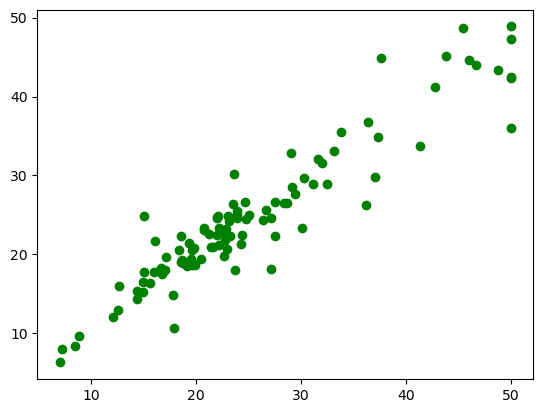

In [91]:
plt.scatter(y_test, y_pred, color ="green")

In [92]:
r2_score(y_test,y_pred)

0.8804987198056593

# Model Validation

In [104]:
tr = ss.transform(boston.data[0].reshape(1,-1))

In [105]:
random_search.predict(tr)

array([24.46095954])

# Pickling the Files

In [107]:
import pickle as pkl

pkl.dump(random_search,open('housepred.pkl','wb'))